# 1. Import Required Librarys

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import rcParams
from sklearn.model_selection import train_test_split, KFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC, LinearSVR
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.optimize import curve_fit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy import stats, special
from scipy.stats import rayleigh, norm, skew, pearsonr
from xgboost import XGBRegressor
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.inspection import permutation_importance
import statsmodels.api as sm
from functions import residual
import pickle


import warnings
warnings.simplefilter(action='ignore')
from sklearn.pipeline import Pipeline
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc('axes', labelsize=12, titlesize=16)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)
plt.rc('legend', fontsize=14)
plt.rc('lines', markersize='8', markeredgecolor='blue', markerfacecolor='white', markeredgewidth=1, linewidth=2)

# 2. Loading Dataset

In [2]:
df = pd.read_csv('resistance.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,LPP,B,TF,TA,AT,k,CF,CAA,lmb,kS,...,Cr,Id,VOLM,WSA,LWL,CB,LCB,CM,CP,CW
0,61.8,15.6,6.5,6.5,270.0,0.42,0.716,0.186,17.39,150.0,...,0.641,M1004_T1,4046.0,1450.0,69.66,0.6457,30.134,0.959,0.6729,0.9149
1,61.8,15.6,6.5,6.5,270.0,0.42,0.716,0.186,17.39,150.0,...,0.841,M1004_T1,4046.0,1450.0,69.66,0.6457,30.134,0.959,0.6729,0.9149
2,61.8,15.6,6.5,6.5,270.0,0.42,0.716,0.186,17.39,150.0,...,0.868,M1004_T1,4046.0,1450.0,69.66,0.6457,30.134,0.959,0.6729,0.9149
3,61.8,15.6,6.5,6.5,270.0,0.42,0.716,0.186,17.39,150.0,...,2.413,M1004_T1,4046.0,1450.0,69.66,0.6457,30.134,0.959,0.6729,0.9149
4,61.8,15.6,6.5,6.5,270.0,0.42,0.716,0.186,17.39,150.0,...,4.065,M1004_T1,4046.0,1450.0,69.66,0.6457,30.134,0.959,0.6729,0.9149


# 3. Exploratory Data Analysis

## 3.1 Undestanding Data

In [3]:
df.shape

(419, 21)

In [4]:
print('Dataset contains following column names:')
for i ,j in enumerate(df.columns):
    print(('%s. %s') %(i, j))

Dataset contains following column names:
0. LPP
1. B
2. TF
3. TA
4. AT
5. k
6. CF
7. CAA
8. lmb
9. kS
10. V
11. Cr
12. Id
13. VOLM
14. WSA
15. LWL
16. CB
17. LCB
18. CM
19. CP
20. CW


In [5]:
df.describe()

,LPP,B,TF,TA,AT,k,CF,CAA,lmb,kS,V,Cr,VOLM,WSA,LWL,CB,LCB,CM,CP,CW
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,71.619737,16.712172,5.882733,6.336026,284.971360,0.342745,0.662115,0.161305,18.447833,143.341289,12.472601,2.079480,5399.124105,1809.735084,76.432840,0.692469,33.676850,0.947936,0.729718,0.907355
std,13.619417,1.975840,1.392724,0.939191,75.796846,0.098391,0.087515,0.032068,2.422131,12.481776,2.918054,1.513662,2589.508305,579.582141,14.136667,0.062682,6.154116,0.026538,0.052264,0.033341
min,44.530000,12.800000,2.400000,4.000000,133.000000,0.200000,0.457000,0.113000,12.710000,120.000000,5.000000,0.020000,1562.900000,775.000000,46.440000,0.551000,20.145000,0.875000,0.590400,0.810400
25%,61.800000,15.200000,5.000000,5.800000,222.000000,0.270000,0.625000,0.134000,16.300000,150.000000,10.000000,1.004000,3716.300000,1475.000000,69.520000,0.672600,30.285000,0.934500,0.698000,0.891300
50%,73.800000,17.000000,6.000000,6.300000,286.000000,0.310000,0.650000,0.162000,19.200000,150.000000,12.000000,1.654000,5270.400000,1858.000000,77.440000,0.698900,33.924000,0.953000,0.738100,0.915400
75%,77.625000,18.000000,7.000000,7.000000,342.000000,0.390000,0.678000,0.178000,20.515000,150.000000,15.000000,2.711000,6235.300000,2061.000000,82.630000,0.724500,36.275500,0.962000,0.755400,0.926500
max,105.600000,21.200000,8.550000,8.550000,466.000000,0.660000,0.910000,0.239000,21.230000,150.000000,19.000000,7.387000,13867.500000,3556.000000,110.590000,0.856400,48.880000,0.993000,0.862000,0.969500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LPP     419 non-null    float64
 1   B       419 non-null    float64
 2   TF      419 non-null    float64
 3   TA      419 non-null    float64
 4   AT      419 non-null    float64
 5   k       419 non-null    float64
 6   CF      419 non-null    float64
 7   CAA     419 non-null    float64
 8   lmb     419 non-null    float64
 9   kS      419 non-null    float64
 10  V       419 non-null    float64
 11  Cr      419 non-null    float64
 12  Id      419 non-null    object 
 13  VOLM    419 non-null    float64
 14  WSA     419 non-null    float64
 15  LWL     419 non-null    float64
 16  CB      419 non-null    float64
 17  LCB     419 non-null    float64
 18  CM      419 non-null    float64
 19  CP      419 non-null    float64
 20  CW      419 non-null    float64
dtypes: float64(20), object(1)
memory usage:

## 3.2 Cleaning Data

### Checking NAN values

In [7]:
df.isna().sum()

LPP     0
B       0
TF      0
TA      0
AT      0
k       0
CF      0
CAA     0
lmb     0
kS      0
V       0
Cr      0
Id      0
VOLM    0
WSA     0
LWL     0
CB      0
LCB     0
CM      0
CP      0
CW      0
dtype: int64

### Checking zero values

In [8]:
miss_value = df.isin({0}).sum()/len(df)*100
miss_value

LPP     0.0
B       0.0
TF      0.0
TA      0.0
AT      0.0
k       0.0
CF      0.0
CAA     0.0
lmb     0.0
kS      0.0
V       0.0
Cr      0.0
Id      0.0
VOLM    0.0
WSA     0.0
LWL     0.0
CB      0.0
LCB     0.0
CM      0.0
CP      0.0
CW      0.0
dtype: float64

# 4. Feature Engineering

## 4.1 Coefficient calculations

In [9]:
df['LB'] = df['LWL']/df['B']
df['T'] = (df['TA']+df['TF'])/2
df['BT'] = df['B']/df['T']
df['Fr'] = df['V']*0.51444/np.sqrt(9.81*df['LWL'])
df['Trim'] = (df['TA'] - df['TF'])+3
df['CB'] = df['VOLM']/(df['LWL']*df['B']*df['T'])
df['CF'] = (105*(df['kS']*10**-6/df['LWL'])**(1/3)-0.64)
df.describe()

,LPP,B,TF,TA,AT,k,CF,CAA,lmb,kS,...,CB,LCB,CM,CP,CW,LB,T,BT,Fr,Trim
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,...,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,71.619737,16.712172,5.882733,6.336026,284.971360,0.342745,0.663529,0.161305,18.447833,143.341289,...,0.650175,33.676850,0.947936,0.729718,0.907355,4.545565,6.109379,2.807869,0.236633,3.453294
std,13.619417,1.975840,1.392724,0.939191,75.796846,0.098391,0.086551,0.032068,2.422131,12.481776,...,0.079083,6.154116,0.026538,0.052264,0.033341,0.426624,1.100097,0.527862,0.056426,0.895914
min,44.530000,12.800000,2.400000,4.000000,133.000000,0.200000,0.457130,0.113000,12.710000,120.000000,...,0.485087,20.145000,0.875000,0.590400,0.810400,3.317143,3.550000,2.076923,0.114326,1.800000
25%,61.800000,15.200000,5.000000,5.800000,222.000000,0.270000,0.627061,0.134000,16.300000,150.000000,...,0.605437,30.285000,0.934500,0.698000,0.891300,4.386111,5.550000,2.492308,0.188729,3.000000
50%,73.800000,17.000000,6.000000,6.300000,286.000000,0.310000,0.654626,0.162000,19.200000,150.000000,...,0.663074,33.924000,0.953000,0.738100,0.915400,4.580120,6.050000,2.738739,0.237233,3.000000
75%,77.625000,18.000000,7.000000,7.000000,342.000000,0.390000,0.678421,0.178000,20.515000,150.000000,...,0.690279,36.275500,0.962000,0.755400,0.926500,4.840909,7.000000,3.000000,0.282506,3.800000
max,105.600000,21.200000,8.550000,8.550000,466.000000,0.660000,0.912109,0.239000,21.230000,150.000000,...,0.879177,48.880000,0.993000,0.862000,0.969500,5.220130,8.550000,4.788732,0.364358,6.200000


In [10]:
tt = (df['TA'] + df['TF'])/2

dft = pd.DataFrame()
dft['k'] = df['k']
dft['CB'] = df['VOLM']/(df['LWL']*df['B']*df['T'])
dft['CM'] = df['CM']
dft['LCB'] = (df['LCB']-0.5*df['LPP'])/df['LPP']*100
dft['CP'] = df['CP']
dft['BT'] = df['B']/df['T']
dft['Fr'] = df['V']*0.51444/np.sqrt(9.81*df['LWL'])
dft['Trim'] = (df['TF'] - df['TA'])/tt
dft['Cr'] = df['Cr']

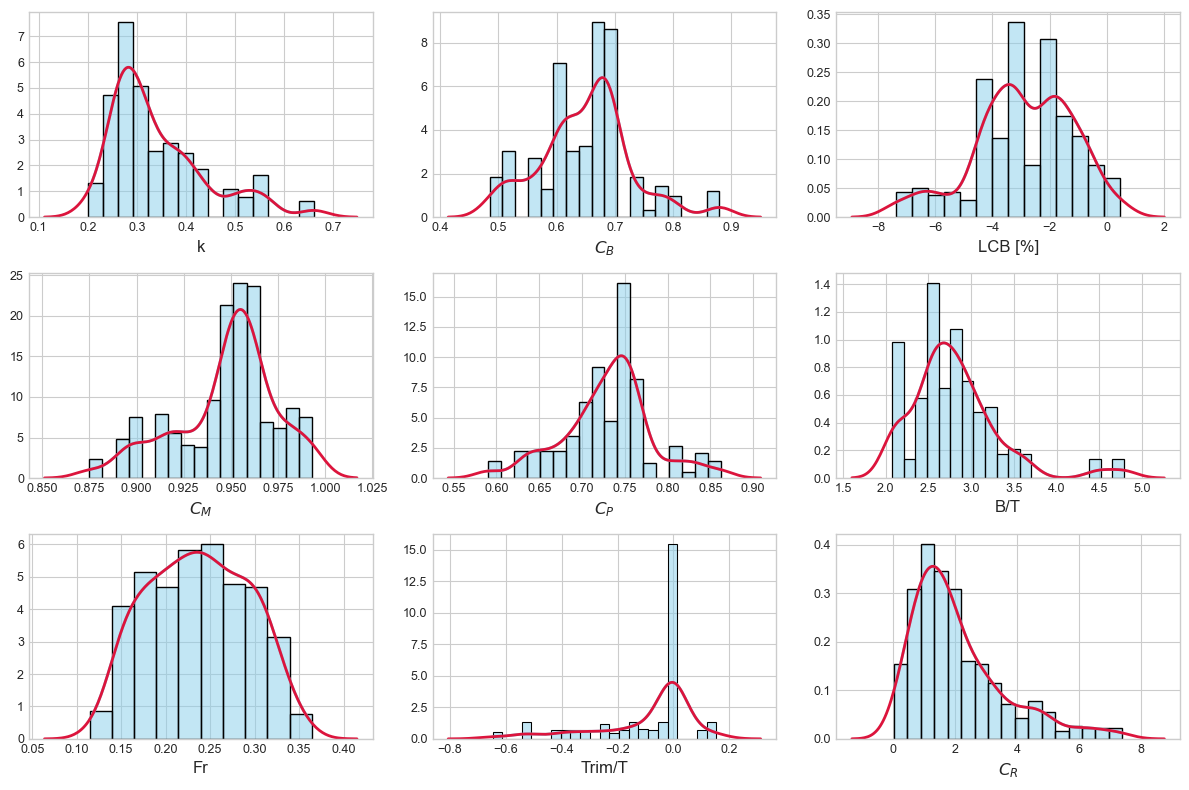

In [11]:

features =  ['k', 'CB', 'LCB', 'CM', 'CP', 'BT', 'Fr', 'Trim', 'Cr']
lbl = ['k', '$C_B$', 'LCB [%]', '$C_M$', '$C_P$', 'B/T', 'Fr', 'Trim/T', '$C_R$']
fig, ax = plt.subplots(figsize=(12,8))
for ind, feature in enumerate(features):
    plt.subplot(3,3,ind+1)
    sns.histplot(dft[feature], stat='density', kde='False', color='skyblue')
    sns.kdeplot(dft[feature], color='crimson')
    vmin = dft[feature].min()
    vmax = dft[feature].max()



    prec = ['%.1f', '%.3f', '%.3f','%.2f','%.3f', '%.3f', '%.2f', '%.3f', '%.3f', '%.2f', '%.2f', '%.2f', '%.3f', '%.3f']
    #plt.axvline(x = vmin, c='black', linewidth=1)
    #plt.axvline(x = vmax, c='black', linewidth=1)
    plt.xlabel(lbl[ind])
    plt.ylabel('')

plt.savefig('features_hist_v2.png', dpi=300)

## 4.1 Chcecking unique model ID from dataset

In [12]:
df['Id'].unique()

array(['M1004_T1', 'M1021_T1', 'M1029_T1', 'M1038_T1', 'M1042_T1',
       'M1055_T1', 'M1066_T1', 'M1076_T1', 'M1076_T2', 'M1077_T1',
       'M1079_T1', 'M1079_T2', 'M1083_T1', 'M1083_T2', 'M1089_T1',
       'M1089_T2', 'M1098_T1', 'M1108_T1', 'M1108_T2', 'M1119_T1',
       'M1119_T2', 'M696_T1', 'M696_T2', 'M815_T1', 'M815_T2', 'M821_T1',
       'M821_T2', 'M823_T1', 'M823_T2', 'M823_T3', 'M904_T1', 'M904_T2',
       'M916_T1', 'M919_T1', 'M956_T1', 'M960_T2', 'M970_T1', 'M970_T2',
       'M974_T1', 'M974_T2', 'M979_T1', 'M979_T2', 'M986_T1', 'M986_T2',
       'M990_T1', 'M990_T2'], dtype=object)

In [13]:
mod = ['M990_T3', 'M990_T4']
#df_test = df.loc[df['Id'] == mod[1]]
df = df.loc[(df['Id'] != mod[0]) & (df['Id'] != mod[1])]
df = df.drop('Id', axis=1)

In [14]:
df = df.drop(['LPP','LWL', 'B', 'T', 'V', 'TA', 'TF', 'kS'], axis=1)

In [15]:
df.shape

(419, 17)

In [16]:
df['Disp'] = df['VOLM']
df = df.drop('VOLM', axis=1)

## 4.3 Plots of variables and correlations

<AxesSubplot:>

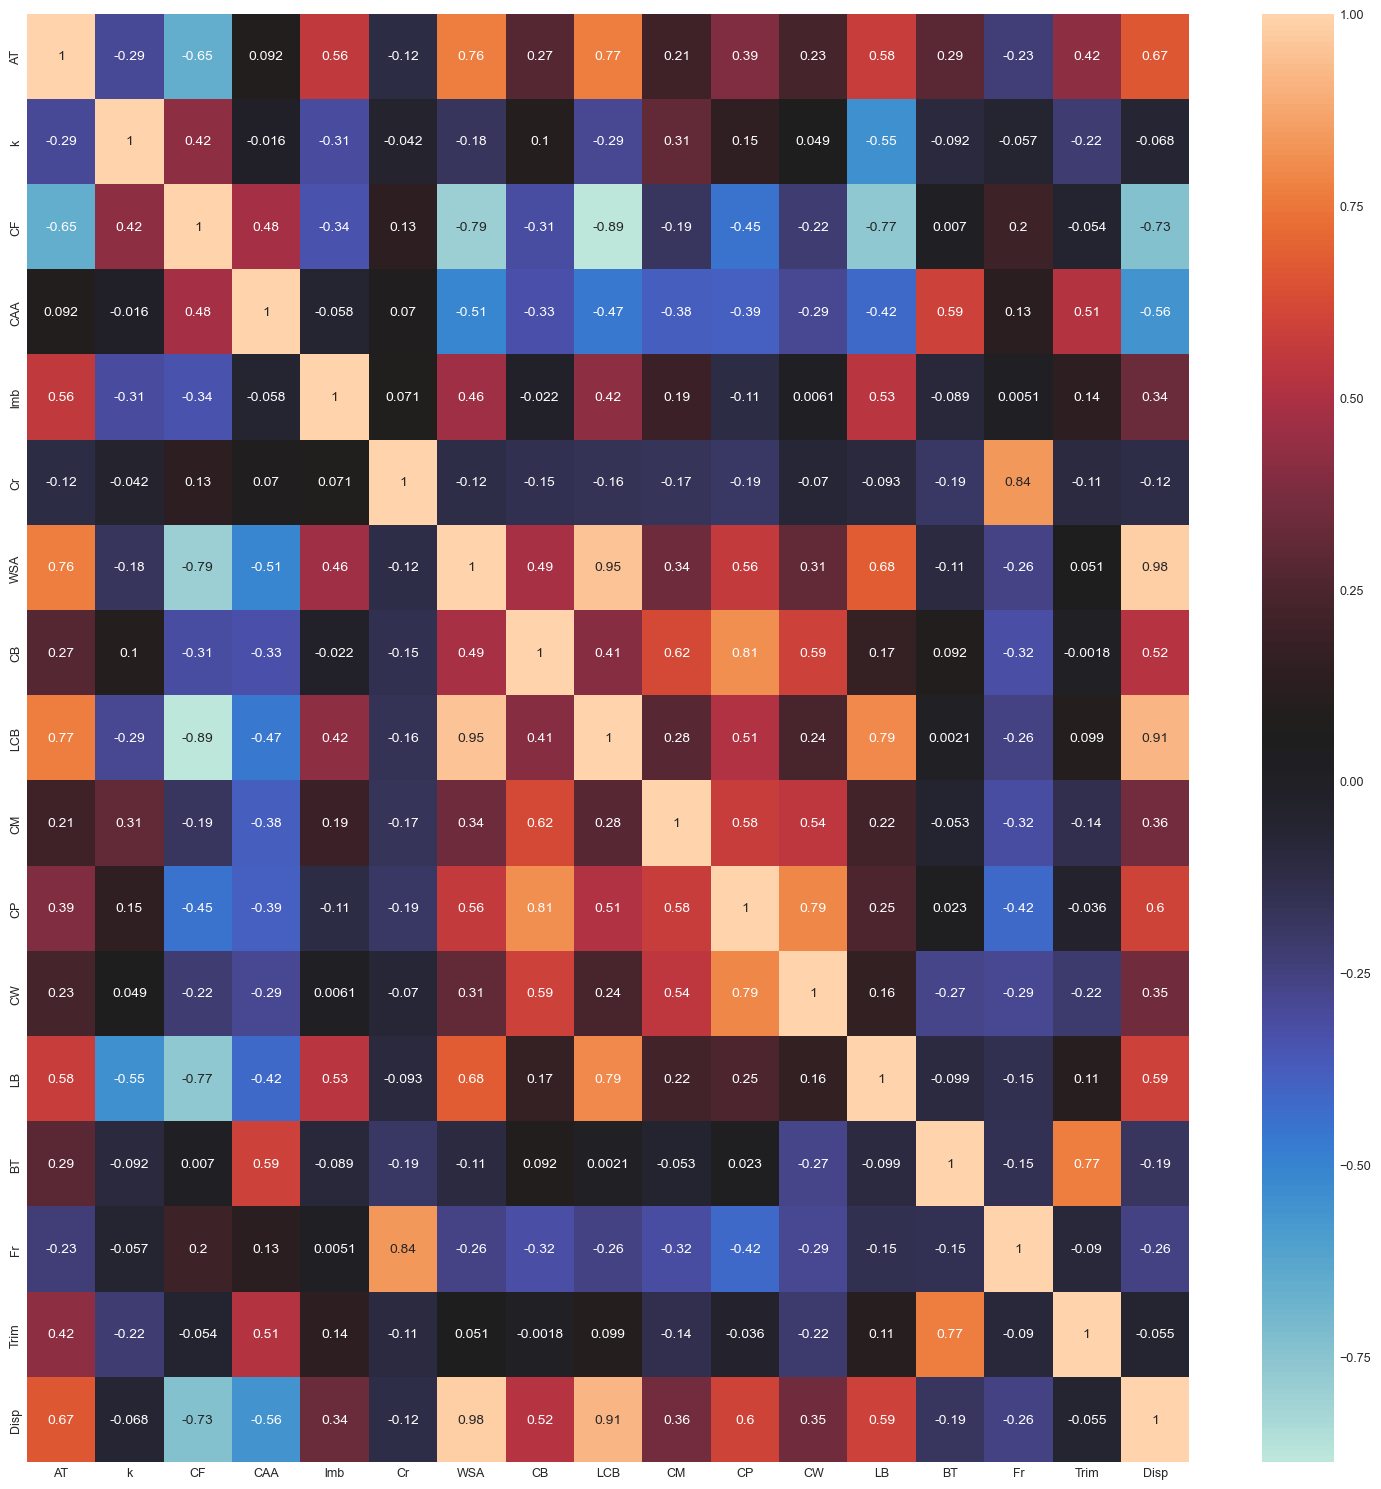

In [17]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='icefire', ax=ax)

[  4052.81536792 -37722.30561251  12004.17729855]


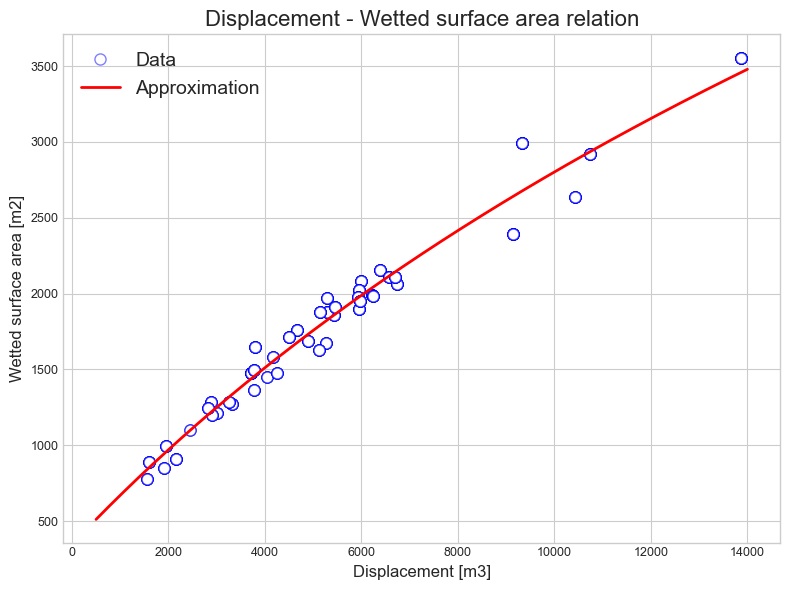

In [18]:
#Displacement (Disp) - Wetted Surface area (WSA)
def func_log(x, a,b,c):
    return a*np.log(c+x)+b

popt,pcov = curve_fit(func_log, df['Disp'], df['WSA'])

xdata = np.arange(500,14000,1)
print(popt)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df['Disp'], df['WSA'],'o', label='Data', zorder=1, alpha=0.5)
ax.plot(xdata, func_log(xdata, *popt), c='red', label='Approximation', zorder=2)
ax.set_xlabel('Displacement [m3]')
ax.set_ylabel('Wetted surface area [m2]')
plt.legend()
plt.title('Displacement - Wetted surface area relation')
df['WSA_Disp'] = func_log(df['Disp'], *popt)

df = df.drop(['Disp', 'WSA'], axis=1)
c0 = [x for x in popt]

In [19]:
df['CAA'] = 0.001*df['AT']/df['WSA_Disp']
df = df.drop(['AT', 'WSA_Disp'], axis=1)


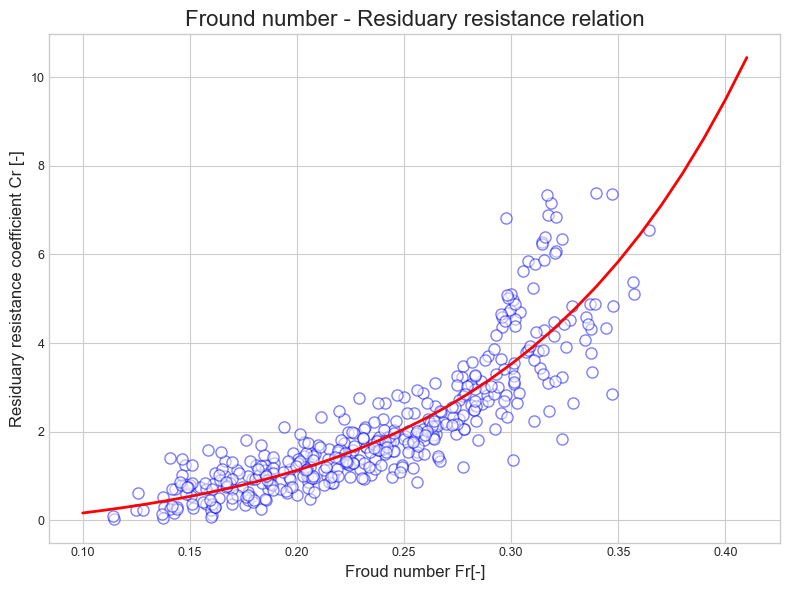

In [20]:
def func_exp(x,a,b,c,d):
    return a*np.exp(b+c*x)+d

xdata = np.arange(0.1, 0.42,0.01)
popt, pcov = curve_fit(func_exp, df['Fr'], df['Cr'])

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df['Fr'], df['Cr'], 'o', label='Data', zorder=1, alpha=0.5)
ax.plot(xdata, func_exp(xdata, *popt), c='red', label='Approximation',zorder=2)
ax.set_xlabel('Froud number Fr[-]')
ax.set_ylabel('Residuary resistance coefficient Cr [-]')
plt.title('Fround number - Residuary resistance relation')
c2 = [x for x in popt]

## 4.4 Handling with Outlires

In [21]:
features = [cname for cname in df.drop('Cr', axis=1).columns]


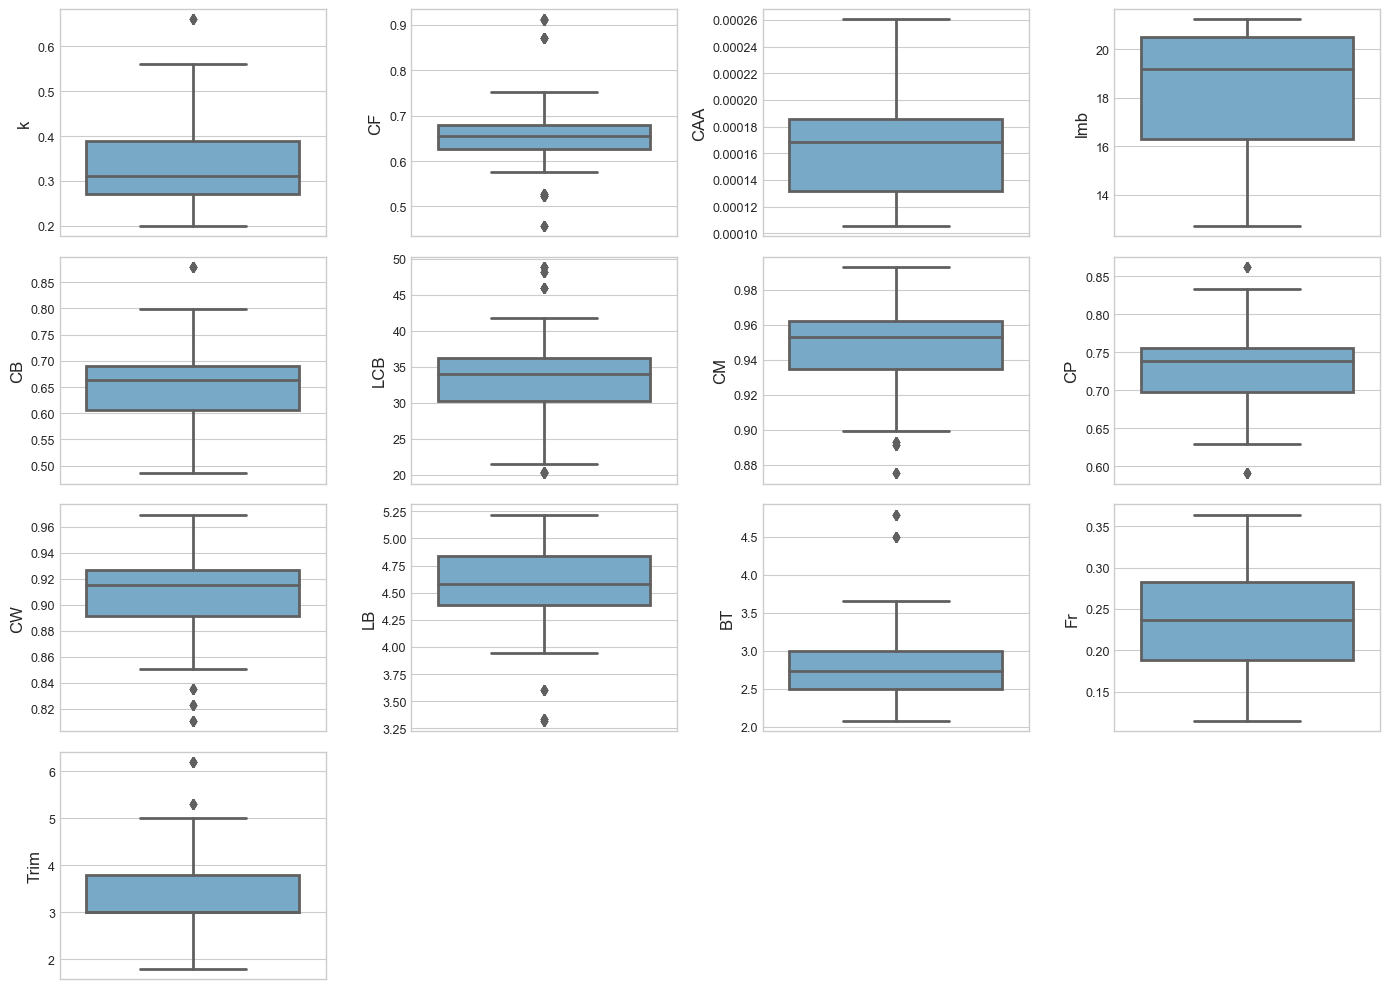

In [22]:
fig, ax = plt.subplots(figsize=(14,10))
plt.subplots_adjust=0.5
for ind, columns in enumerate(features):
    plt.subplot(4,4,ind+1)
    sns.boxplot(data=df, y=columns, palette='Blues')

In [23]:
df = df.loc[df['LB']>3]
df = df.loc[df['BT']<=4]
df = df.loc[df['k']<0.6]
df = df.loc[df['CB']<0.85]

## 4.5 Skew and Kurthosis Analysis

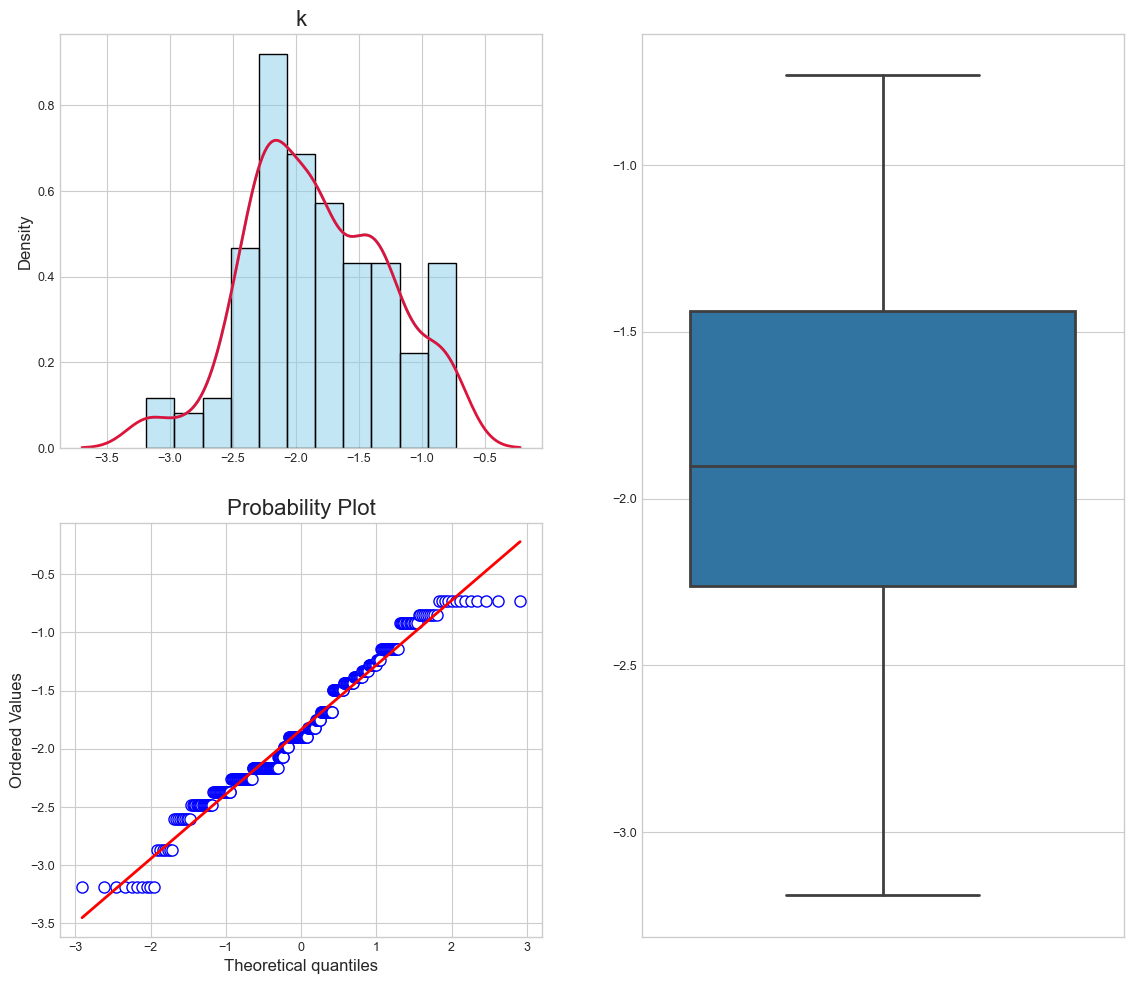

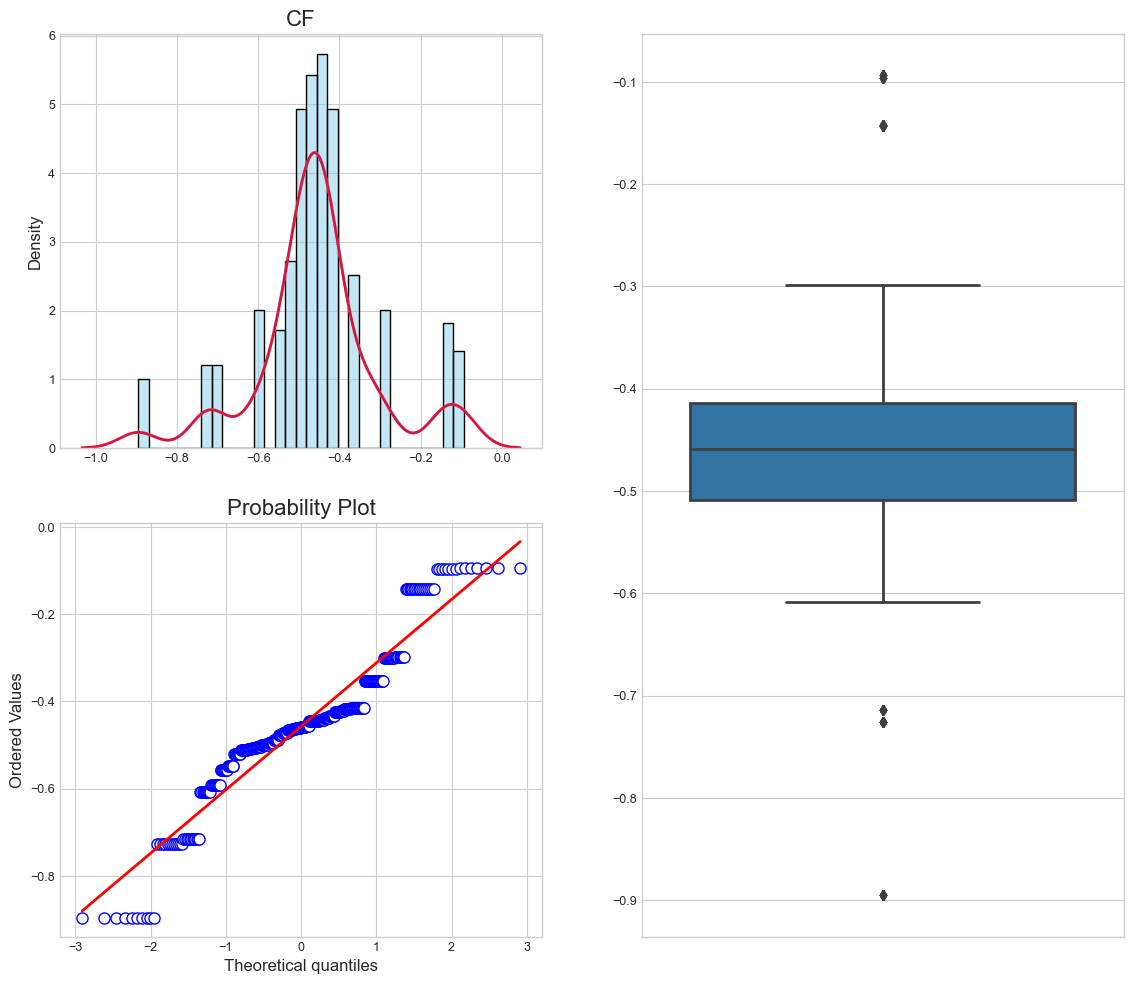

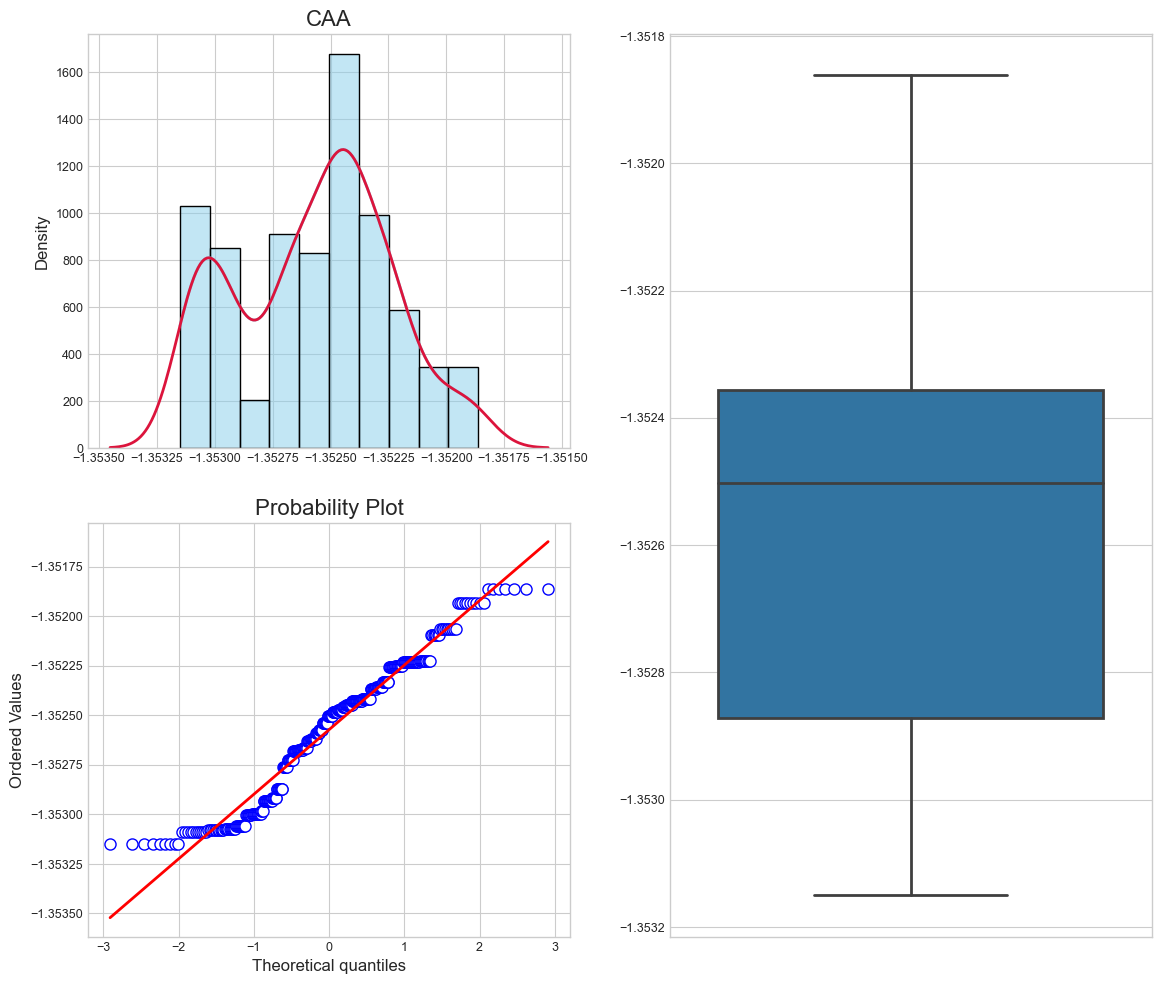

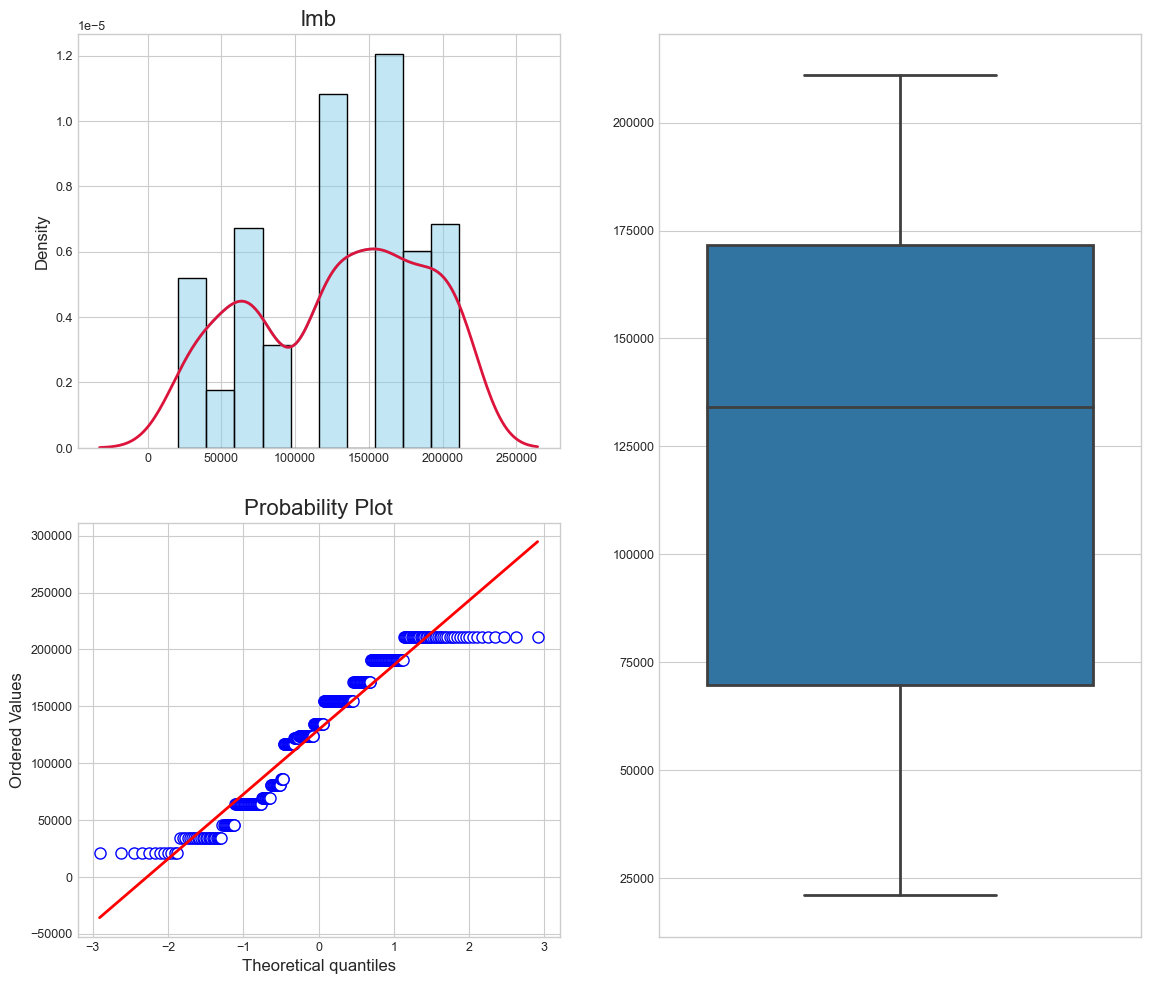

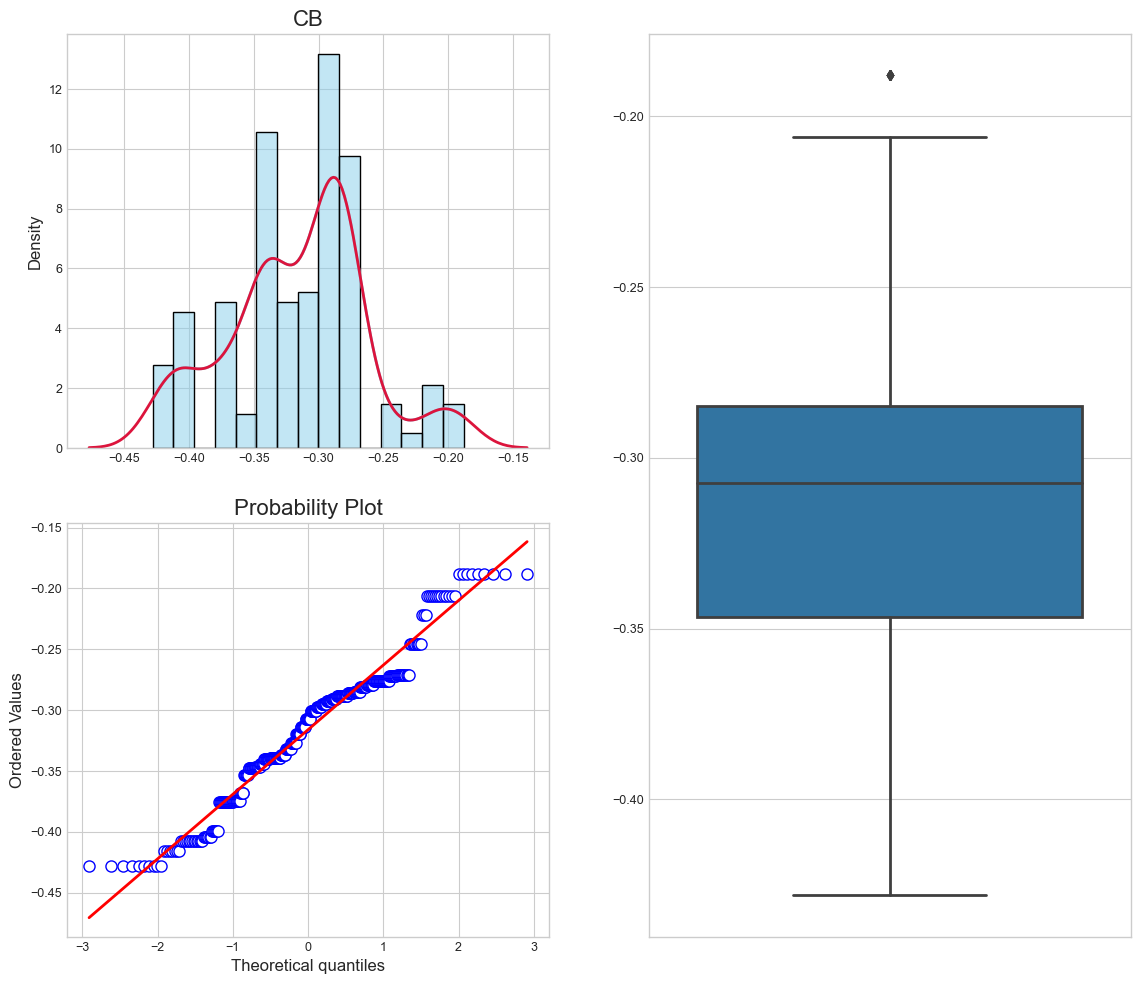

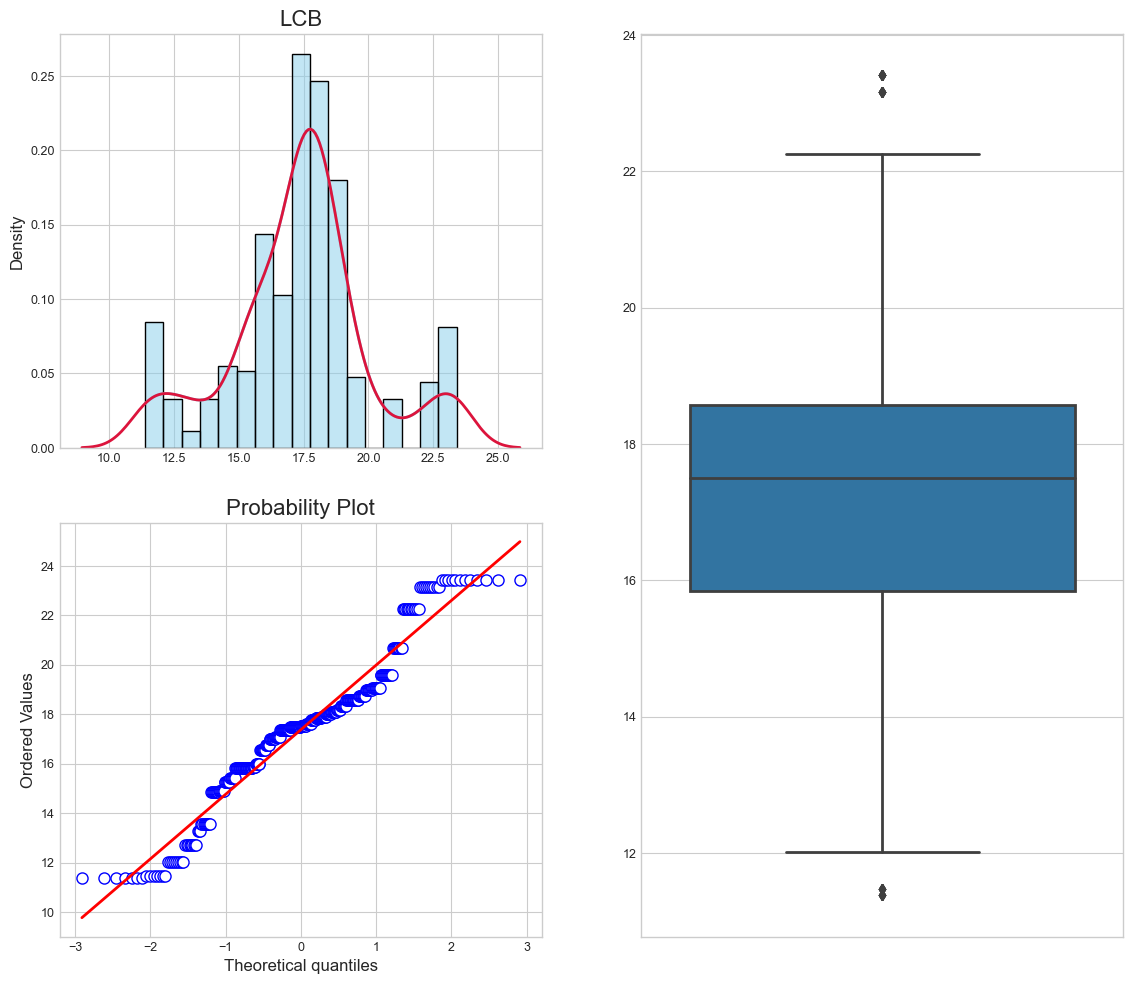

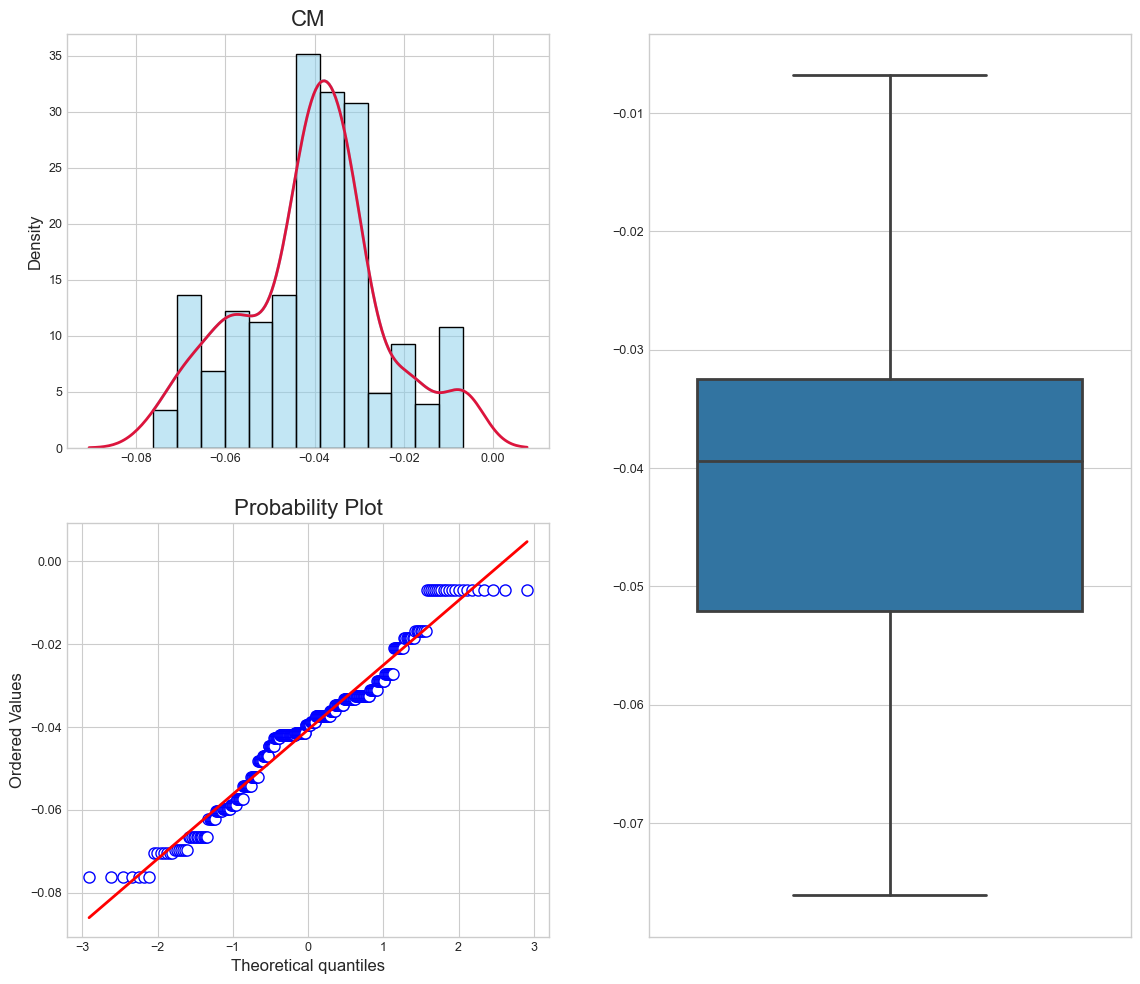

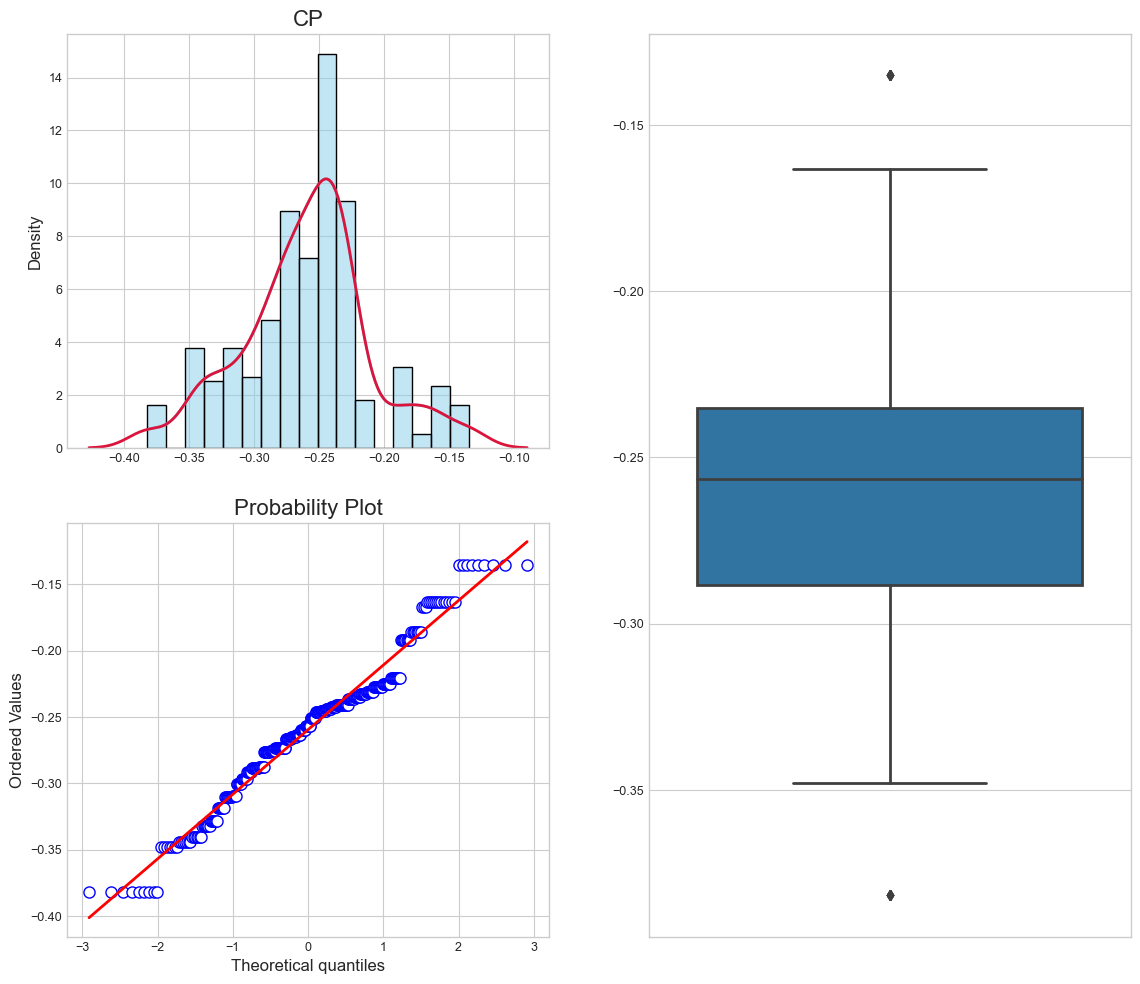

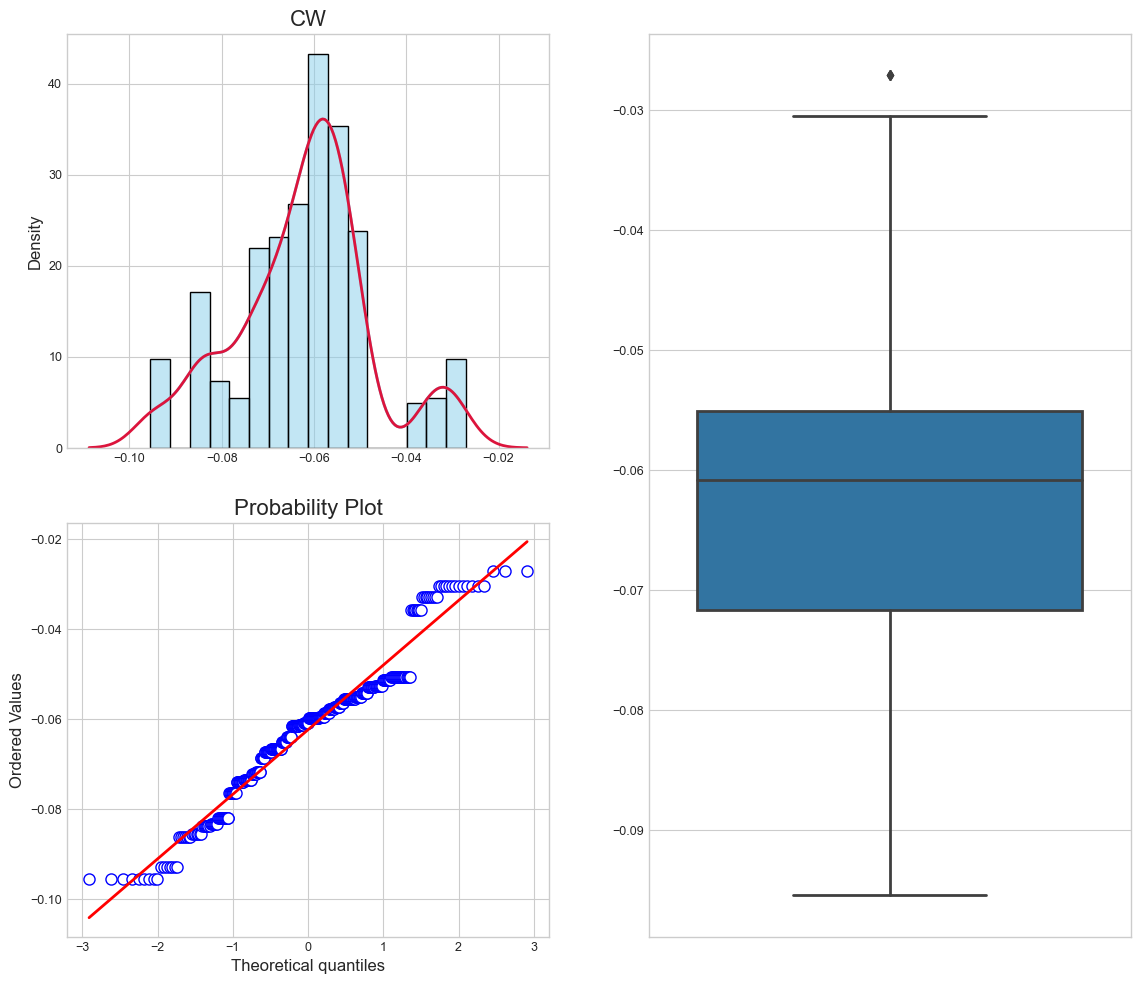

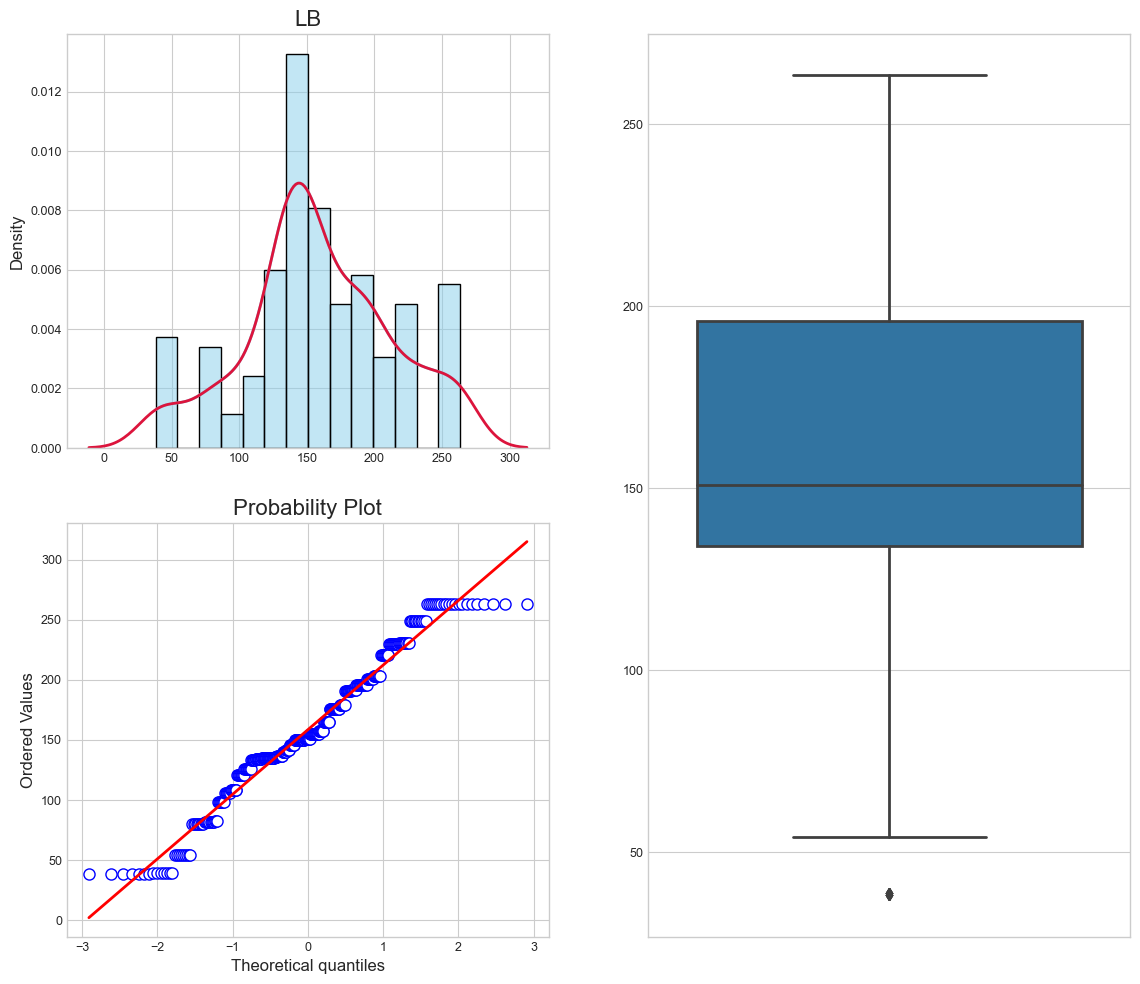

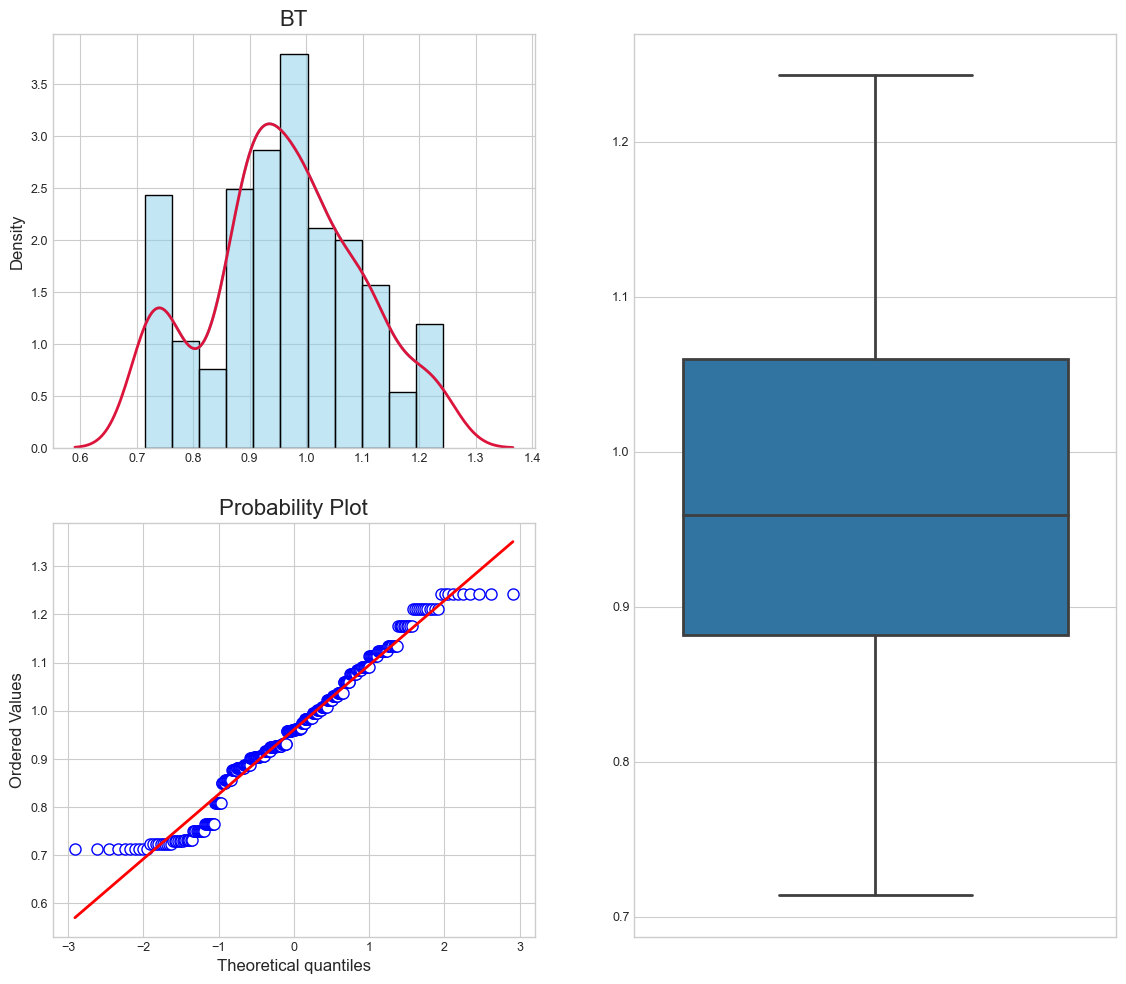

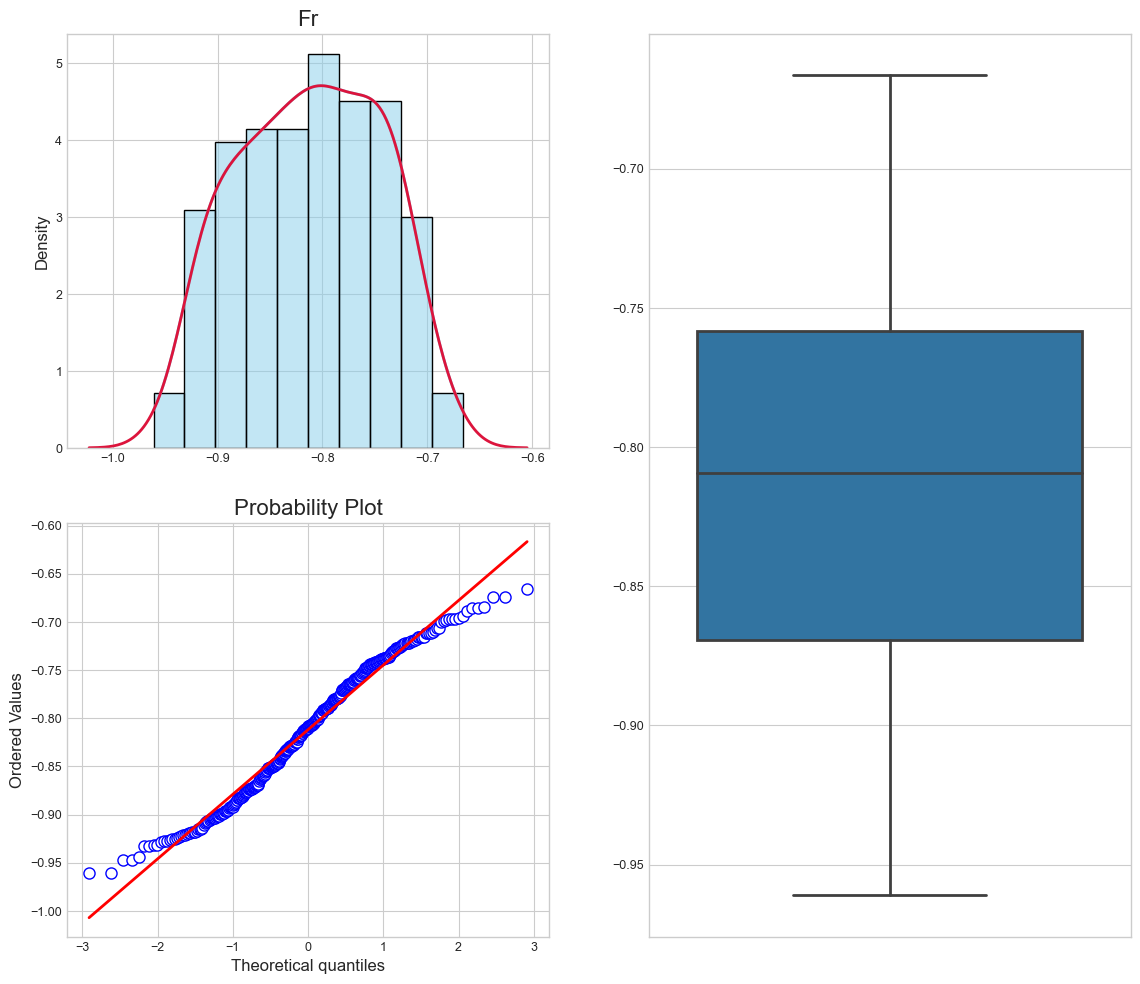

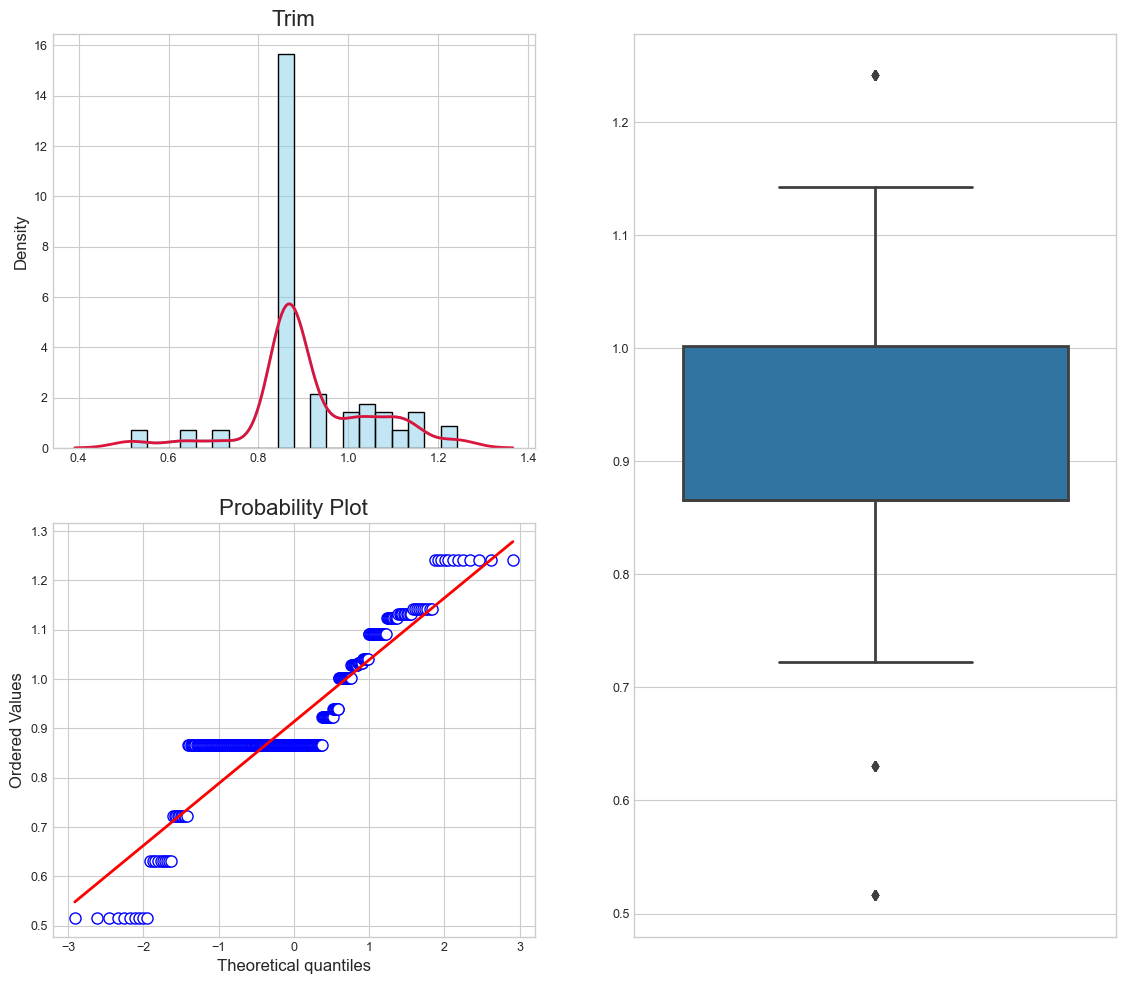

In [24]:
df_skew = pd.DataFrame()
skew_feature = pd.DataFrame()
kurtosis_feature = pd.DataFrame()
for feature in enumerate(features):

    fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                                   ['lower left', 'right']], figsize=(14,12), constrained_layout=True)
    
    ss = stats.boxcox(df[feature[1]])[0]
    #LWL = df[feature[1]]
    sns.histplot(ss, ax=axd['upper left'], stat='density', kde='False', color='skyblue')
    sns.kdeplot(ss, color='crimson', ax=axd['upper left'])
    stats.probplot(ss, plot=axd['lower left'])
    sns.boxplot(y=ss, ax=axd['right'])
    pd.Series(ss).skew()
    axd['upper left'].set_title(feature[1])

    skew_feature[feature[1]] = [df[feature[1]].skew(), pd.Series(ss).skew()]
    kurtosis_feature[feature[1]] = [df[feature[1]].kurtosis()]
    
    
    df_skew[feature[1]] = ss

    

In [25]:
skew_feature['Skew'] = ['Original', 'Box_cox']

In [26]:
skew_feature.set_index('Skew')

,k,CF,CAA,lmb,CB,LCB,CM,CP,CW,LB,BT,Fr,Trim
Skew,,,,,,,,,,,,,
Original,0.956697,0.864297,0.05445,-0.866153,-0.198715,0.203520,-0.659344,-0.067706,-0.932338,-1.000889,0.349349,-0.031199,1.309905
Box_cox,0.027425,-0.023175,-0.04505,-0.272071,-0.009756,0.023106,-0.014247,0.013392,0.007508,-0.040919,0.001631,-0.074265,-0.039580


In [27]:
kurtosis_feature

,k,CF,CAA,lmb,CB,LCB,CM,CP,CW,LB,BT,Fr,Trim
0,0.327163,1.8281,-0.715799,-0.264077,-0.097149,0.59254,0.305218,0.456648,1.09607,1.299736,-0.322299,-0.962634,1.95991


### Target Analysis

In [28]:
def target_plot(target):
    sk = target.skew()
    kurt = target.kurtosis()

    fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                                   ['lower left', 'right']], figsize=(14,12))

    #Histogram
    sns.histplot(target, ax=axd['upper left'], stat='density', kde='False', color='skyblue')
    sns.kdeplot(target, color='blue', ax=axd['upper left'], label='KDE')
    axd['upper left'].axvline(x = target.mean(), c='red', linewidth=1.5, label = 'mean')
    axd['upper left'].axvline(x = target.median(), c='green', linewidth=1.5, label = 'median')
    axd['upper left'].legend()
    
    #Pobability plot
    stats.probplot(target, plot=axd['lower left'])
    value = [sk, kurt]
    lbl = ['Skew', 'Kurtosis']
    
    [axd['lower left'].text(0.03,0.9-0.1*x,'%s = %.2f' %(lbl[x],y) ,
                           fontsize=18, transform=axd['lower left'].transAxes, 
                           bbox=dict(facecolor='skyblue', alpha=.3)) for x,y in enumerate(value)]

    #Box plot
    medianprops = dict(linewidth=3, linestyle='-', color='crimson')
    boxprops = dict(linestyle='-', linewidth=1.5, color='darkblue')
    capprops = dict(color='darkblue')
    whiskerprops = dict(color='darkblue')

    xs = np.random.normal(1,0.04, df.shape[0])
    axd['right'].scatter(xs, target, c='skyblue', alpha=.5)
    axd['right'].boxplot(target, medianprops=medianprops, boxprops=boxprops, capprops=capprops, whiskerprops=whiskerprops)
    axd['right'].set_xlabel('Cr')

0.30477538635872703

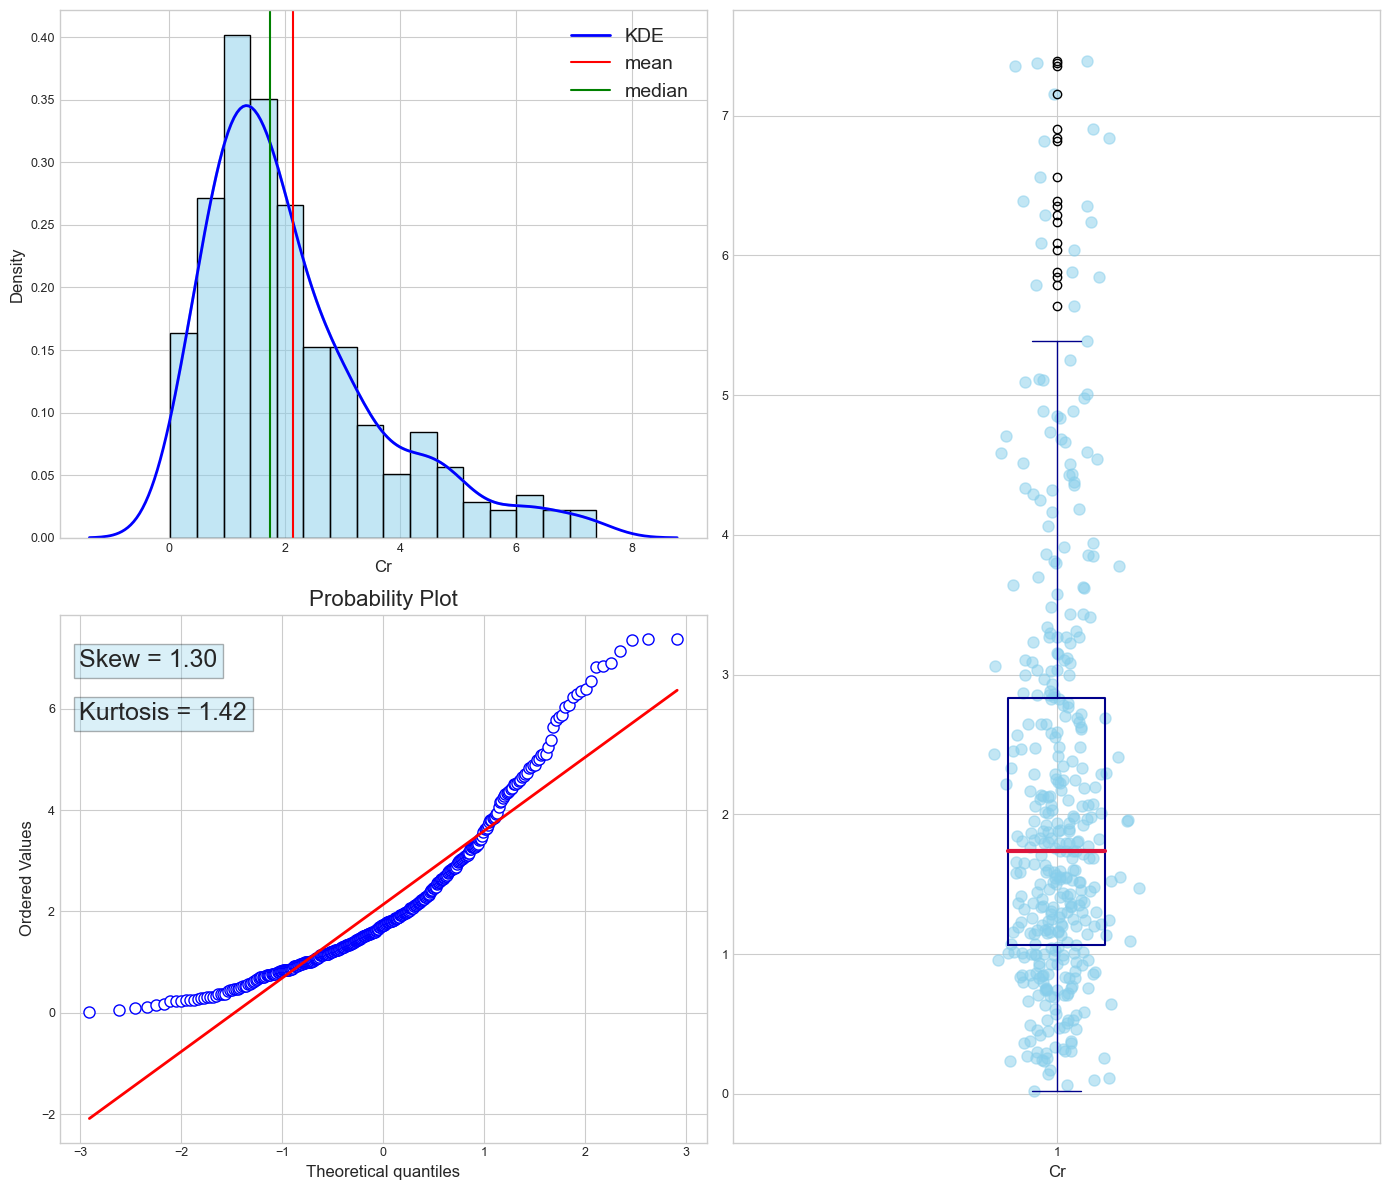

In [29]:
Cr_skew, lmb = stats.boxcox(df['Cr'])
target_plot(df['Cr'])
df_skew['Cr_skew'] = Cr_skew
lmb

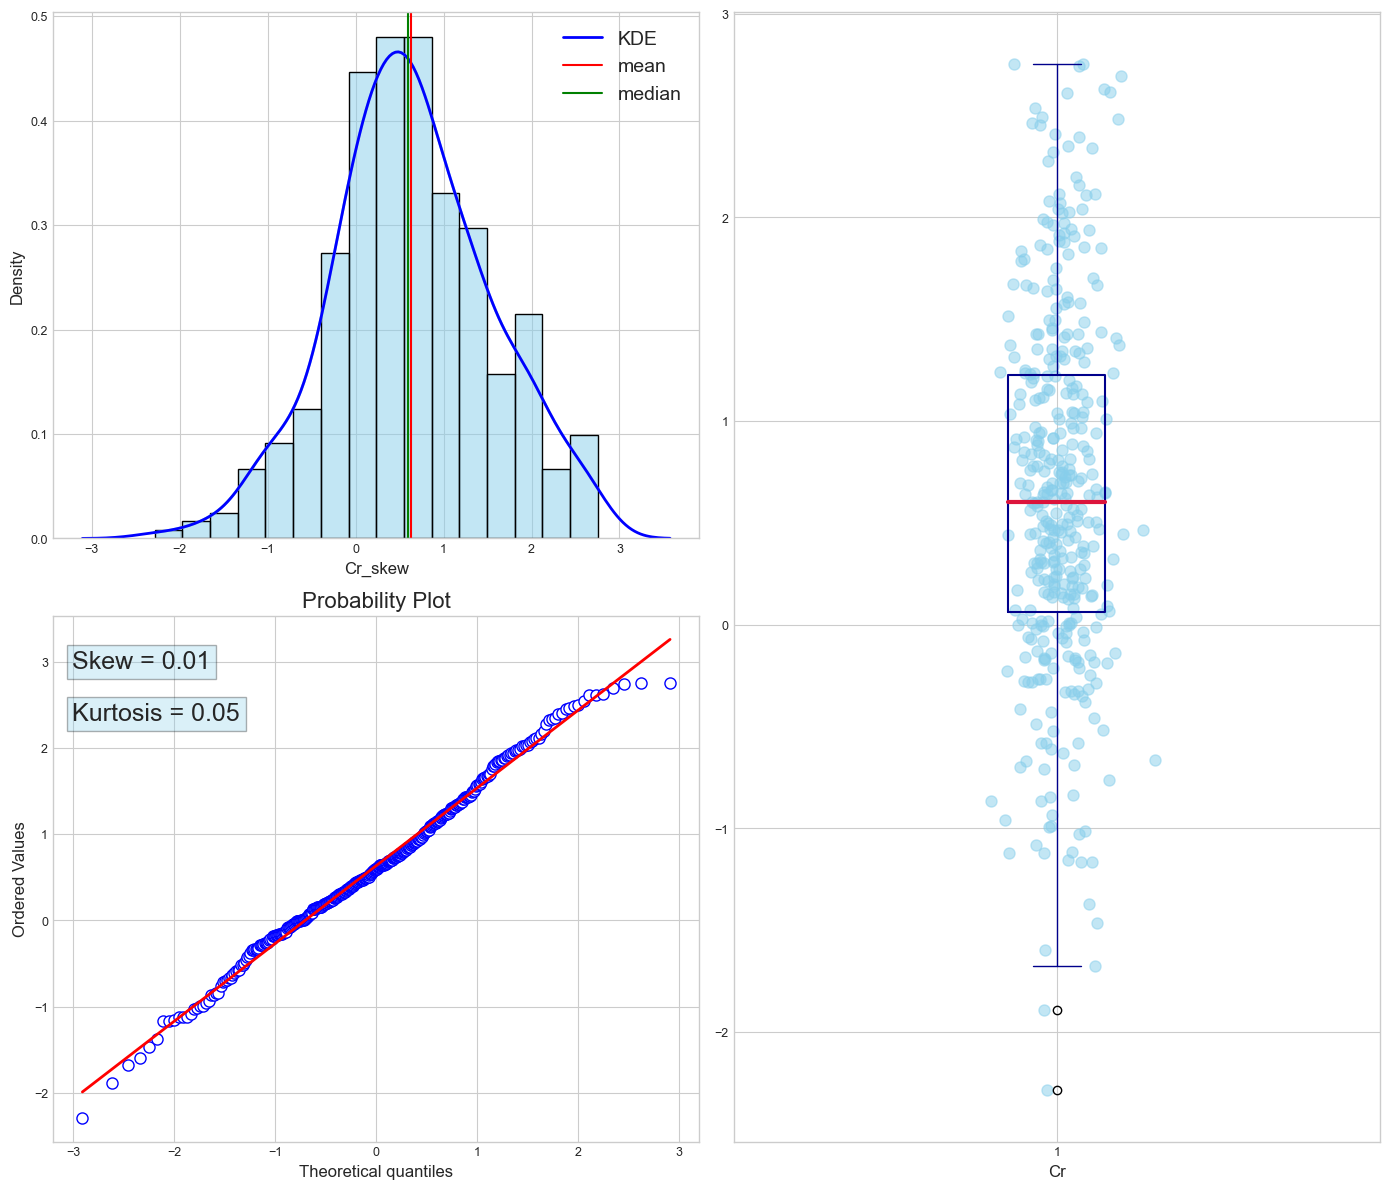

In [30]:
target_plot(df_skew['Cr_skew'])

# 5. Machine Learning Algorythms

## 5.1 Split to Train and Test Data

In [31]:
X = df_skew.drop(['Cr_skew', 'lmb', 'LB', 'CW', 'CAA', 'CF'], axis=1)
y= df_skew['Cr_skew']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42
                                                   )

## 5.2 Scaling features

In [33]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

## 5.3 Scoring selected machine leanring models

In [34]:
kf = KFold(n_splits=10,shuffle=True,random_state=12)

In [35]:
def scoring(model):
    model.fit(X_train_sc,y_train)
    y_pred = model.predict(X_test_sc)
    RMSE = np.sqrt(-cross_val_score(model, X,y, cv=kf, scoring = 'neg_mean_squared_error')).mean()
    MAE = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    _, p_value = stats.pearsonr(y_test, y_pred)
    return RMSE, MAE, r2, p_value

In [36]:
svr = LinearSVR()
las = Lasso(alpha=0.001)
rid = Ridge()
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05)
RandomForest = RandomForestRegressor()
GradBoostReg = GradientBoostingRegressor(n_estimators=2000, max_depth=6, learning_rate=0.04, subsample=0.5, criterion='squared_error')

models = [svr, las, rid, xgb, RandomForest, GradBoostReg]


In [37]:
score = pd.DataFrame()
for i in models:
    RMSE, MAE, r2, p_value = scoring(i)
    score = score.append(pd.DataFrame({'RMSE': RMSE, 'MAE':MAE, 'R2':r2, 'p-value':p_value}, index=[type(i).__name__]))

In [38]:
score.index = ['LSVR', 'Lasso', 'Ridge', 'XGB', 'RFR', 'GBR']


In [39]:
scoreT = score.T
scoreT['method'] = scoreT.index
scoreT = scoreT.drop(['p-value', 'MAE'], axis=0)

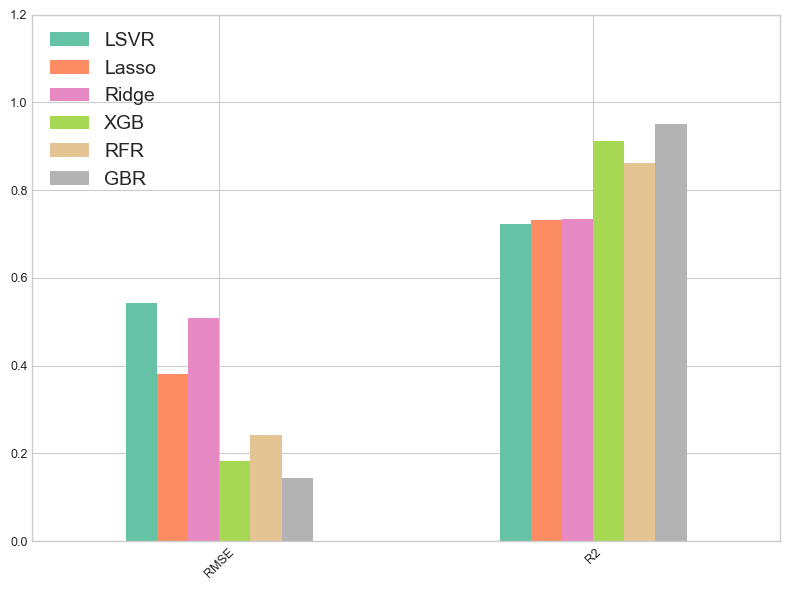

In [40]:
fig, ax = plt.subplots(figsize=(8,6))
scoreT.plot(x='method', y=['LSVR', 'Lasso', 'Ridge', 'XGB', 'RFR', 'GBR'], kind='bar', xlabel='', ax=ax, rot=45, colormap='Set2')
ax.set_ylim(0,1.2)
ax.legend(loc='upper left', fontsize=14)
plt.savefig('ML_r2_rmse_v2.png', dpi=300)




# 5.4 Building Gradient Boosting Regressoe model

In [41]:
X = df.drop(['Cr', 'lmb', 'LB', 'CW', 'CAA', 'CF'], axis=1)
y= df['Cr']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42
                                                   )
pt = PowerTransformer(method='yeo-johnson')

gbr = GradientBoostingRegressor(n_estimators=2000, max_depth=6, learning_rate=0.04, subsample=0.5, criterion='squared_error')
pipe = Pipeline(steps=[('power', pt), ('scale',StandardScaler()), ('mod', gbr)])


model = TransformedTargetRegressor(regressor=pipe, transformer=pt)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)


0.9624572622408238

In [42]:
model

TransformedTargetRegressor(regressor=Pipeline(steps=[('power',
                                                      PowerTransformer()),
                                                     ('scale',
                                                      StandardScaler()),
                                                     ('mod',
                                                      GradientBoostingRegressor(criterion='squared_error',
                                                                                learning_rate=0.04,
                                                                                max_depth=6,
                                                                                n_estimators=2000,
                                                                                subsample=0.5))]),
                           transformer=PowerTransformer())

In [43]:
X.columns

Index(['k', 'CB', 'LCB', 'CM', 'CP', 'BT', 'Fr', 'Trim'], dtype='object')

### Checking best paramteres for the estimator

In [44]:
params = {'mod__learning_rate': [0.01,0.02,0.03,0.04],
                  'mod__subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'mod__n_estimators' : [500,1000, 1500, 2000],
                  'mod__max_depth'    : [4,6,8,10]
                 }
#gs_gbr = GridSearchCV(estimator=pipe, param_grid=params, cv=5, n_jobs=-1)
#gs_gbr.fit(X_train_sc, y_train)
#gs_gbr.best_params_

## 5.5 Feature Importances

Text(0.5, 1.0, 'Feature Importance')

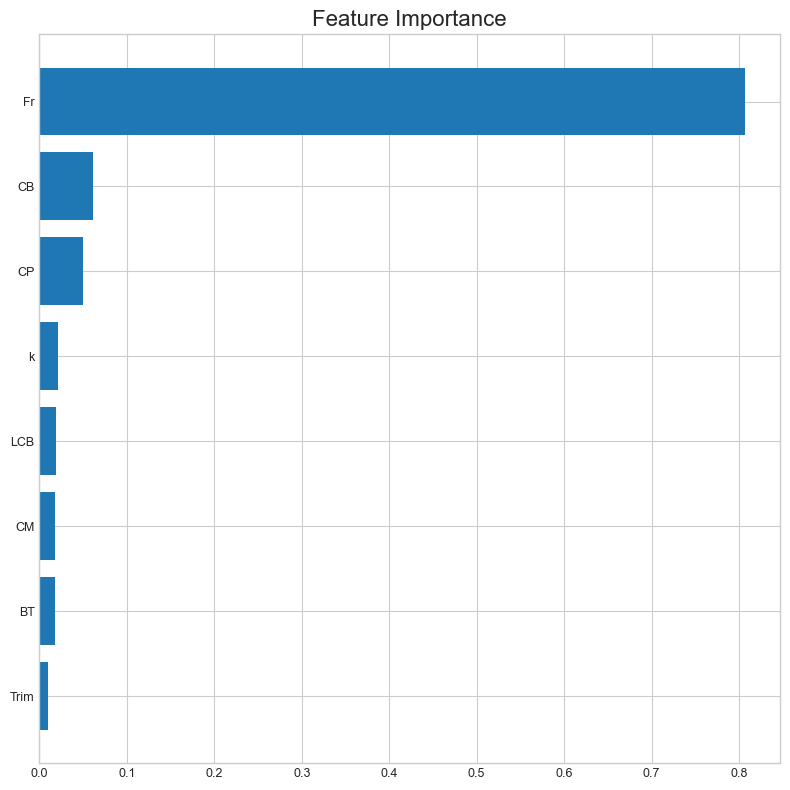

In [45]:
gbr.fit(X_train, y_train)
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')

<AxesSubplot:>

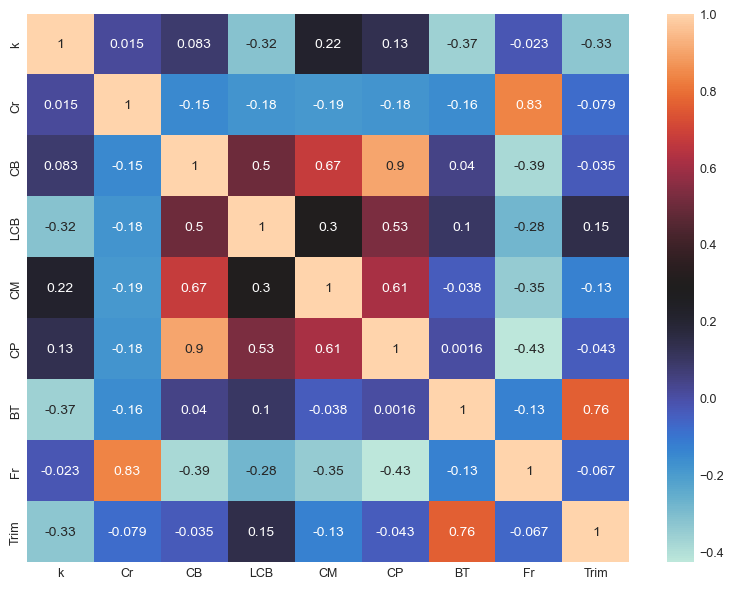

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
dff = df.drop(['lmb', 'LB', 'CW', 'CAA', 'CF'], axis=1)
sns.heatmap(dff.corr(), annot=True, cmap='icefire')

##### 

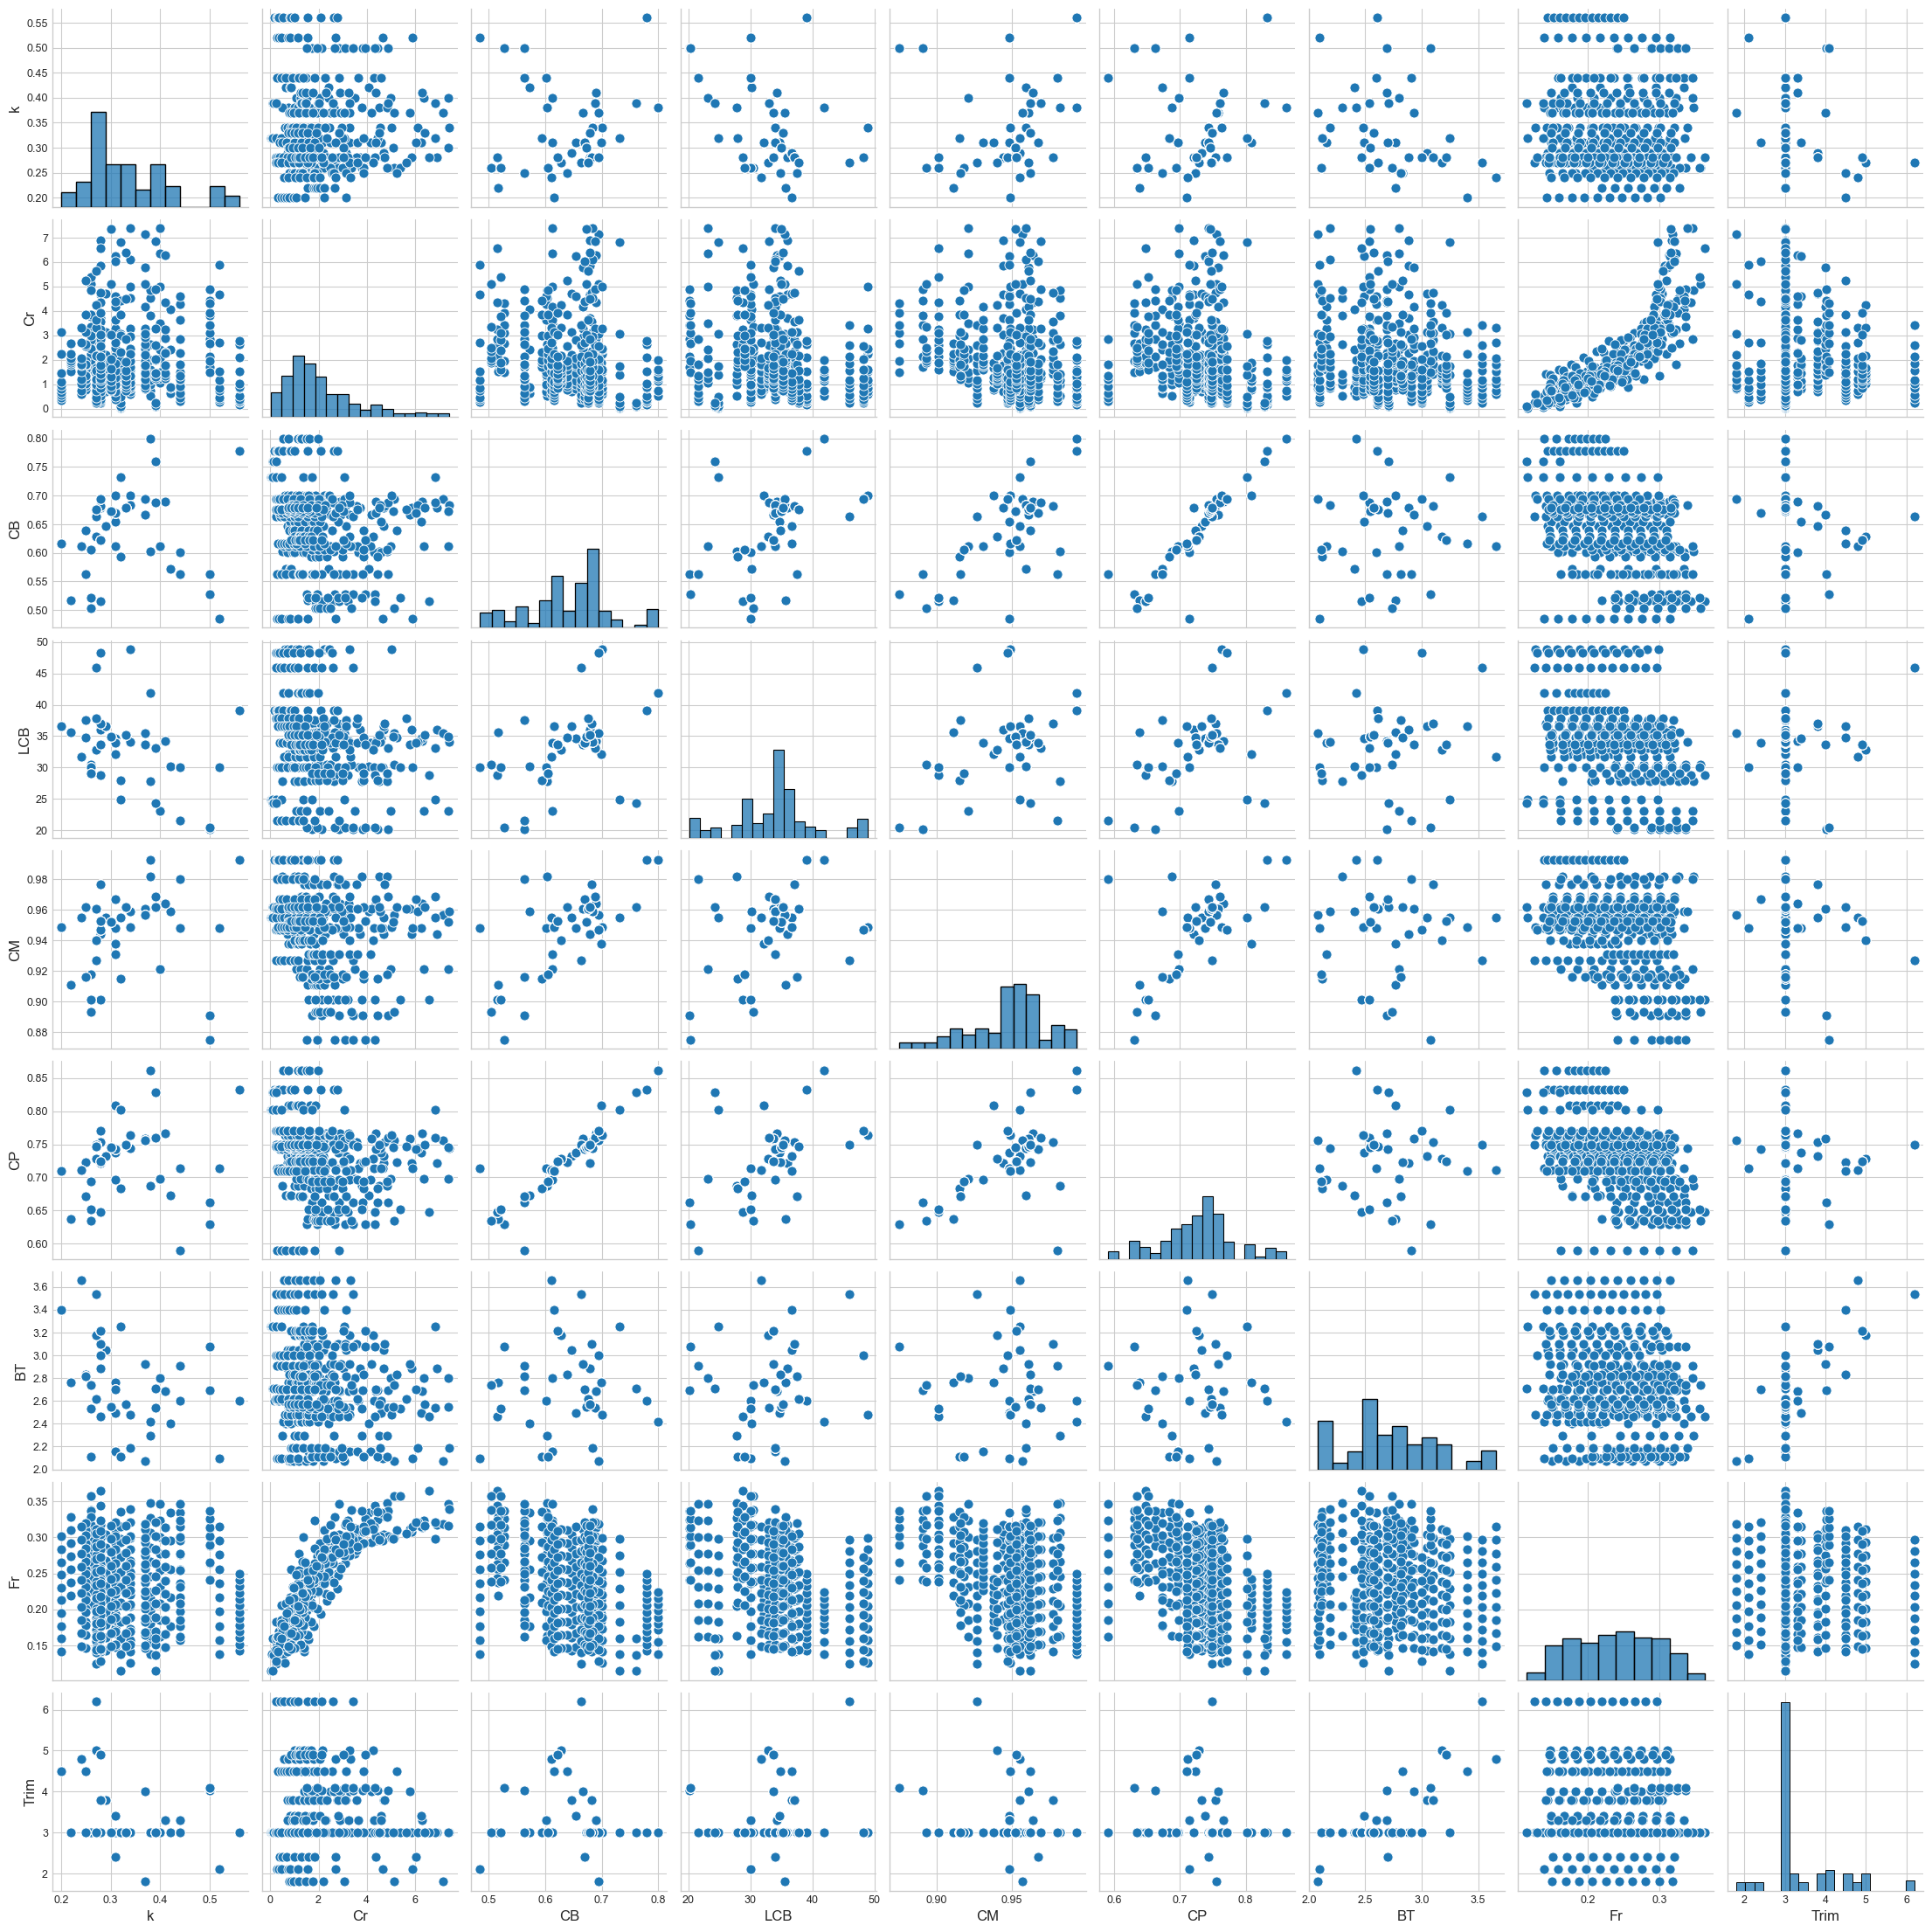

In [47]:
sns.pairplot(dff)

# 6. Deep Neural Network model

In [48]:
def dnn_model():
    classifier = Sequential()
    classifier.add(Dense(units=256,activation='relu',input_dim=8,kernel_initializer='he_uniform'))
    classifier.add(Dense(units=64,activation='relu',kernel_initializer='he_uniform'))
    classifier.add(Dense(units=48,activation='relu',kernel_initializer='he_uniform'))
    classifier.add(Dense(units=24,activation='relu',kernel_initializer='he_uniform'))
    classifier.add(Dense(units=24,activation='relu',kernel_initializer='he_uniform'))
    classifier.add(Dense(units=12,activation='relu',kernel_initializer='he_uniform'))
    classifier.add(Dense(units=10,activation='relu',kernel_initializer='he_uniform'))
    classifier.add(Dense(units=1,activation='linear'))
    
    classifier.compile(loss='mean_absolute_error',optimizer=Adam(learning_rate=0.01), metrics='mse')
    return classifier

In [49]:
clf = KerasRegressor(build_fn =dnn_model, validation_split=0.1, epochs=100, batch_size=20,verbose=0)

In [50]:
qt2 = QuantileTransformer(n_quantiles=1200, output_distribution='normal')
pipe_dnn = Pipeline(steps=[('power', pt),('scaler', StandardScaler()), ('mod', clf)])


In [51]:
model_dnn = TransformedTargetRegressor(regressor=pipe_dnn, transformer=qt2)
model_dnn.fit(X_train, y_train)
y_pred_dnn = model_dnn.predict(X_test)
R2 = r2_score(y_test,y_pred_dnn)
R2

2023-07-23 19:42:21.279924: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.9605439000327846

In [55]:
pickle.dump(model_dnn, open('clf.h5', 'wb'))
#model_dnn.save('model_dnn.h5')

INFO:tensorflow:Assets written to: ram://395ee7b8-e6b0-4e98-a73e-ceb561d2f9b1/assets


# 7. MODEL VALIDATION

## 7.1 Residual Plot

In [60]:
def plot_res(y_test, y_pred, fig, ax0, ax1, color, lbl,i):
    res = y_pred-y_test
    re = res.reset_index()
    max_res = max(abs(res))
    ind = np.where(abs(res) == max_res)
 

    ax0.plot(y_pred, res,'o', markeredgecolor=color, label=lbl)
    ax0.axhline(y=0, xmin=0, xmax=df['Cr'].max(), c='black', zorder=1)
    ax0.vlines(x = y_pred[ind], ymin = 0, ymax = res.iloc[ind].values, color='dark%s' %color)
    ax0.set_ylim(-1.5,1.5)
    ax0.set_xlim(-1,8)
    ax0.set_title('Target Residual plot', fontsize=22)
    ax0.set_ylabel('Residuals')
    ax0.set_xlabel('Predictied values')
    ax0.legend()
    sns.histplot(y=res, bins=30,ax=ax1, color='light%s'%color, stat='density')
    sns.kdeplot(y=res, color=color, ax=ax1)
    ax1.axhline(y=0, xmin=0, xmax=5, c='black', zorder=1)
    ax1.set_ylim(-1.5, 1.5)
    ax1.text(0.3,1-0.05*i, '%s_mean = %.2f' %(lbl,np.mean(res)), transform=ax1.transAxes, fontsize=13)
    ax1.axis('off')

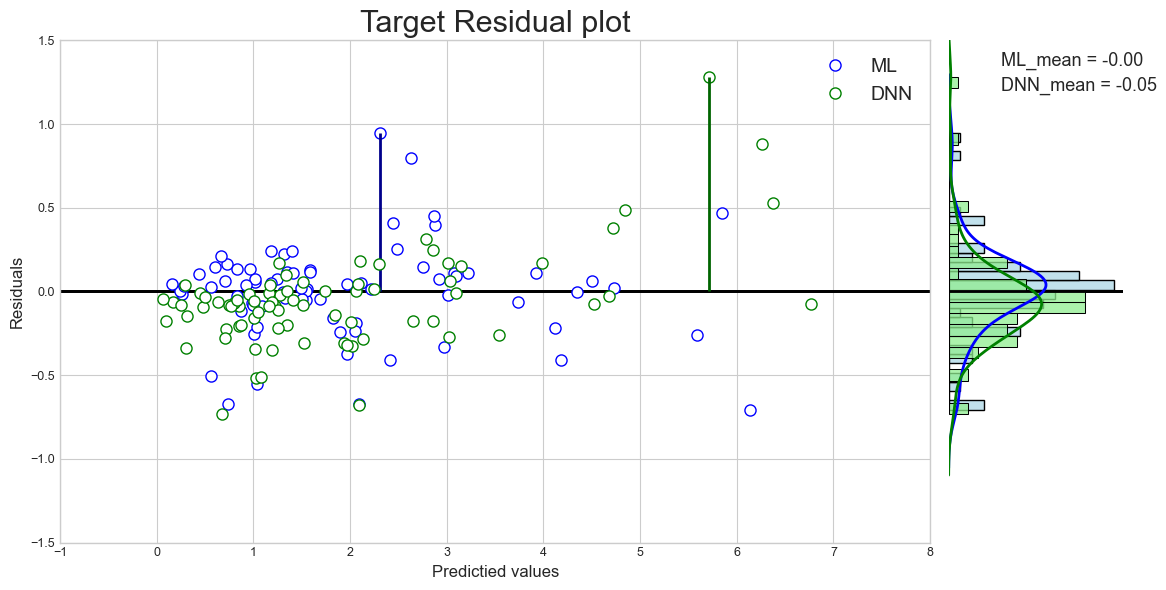

In [61]:
spec = gridspec.GridSpec(ncols=2, nrows=1, 
                         width_ratios=[5, 1])
fig = plt.figure(figsize=(12,6))
ax0 = fig.add_subplot(spec[0])
ax1 = fig.add_subplot(spec[1])
plot_res(y_test, y_pred,fig, ax0, ax1, 'blue', 'ML',1)
plot_res(y_test, y_pred_dnn, fig, ax0,ax1,'green', 'DNN',2)

## 7.2 Check Linearity and Homoscedasticity

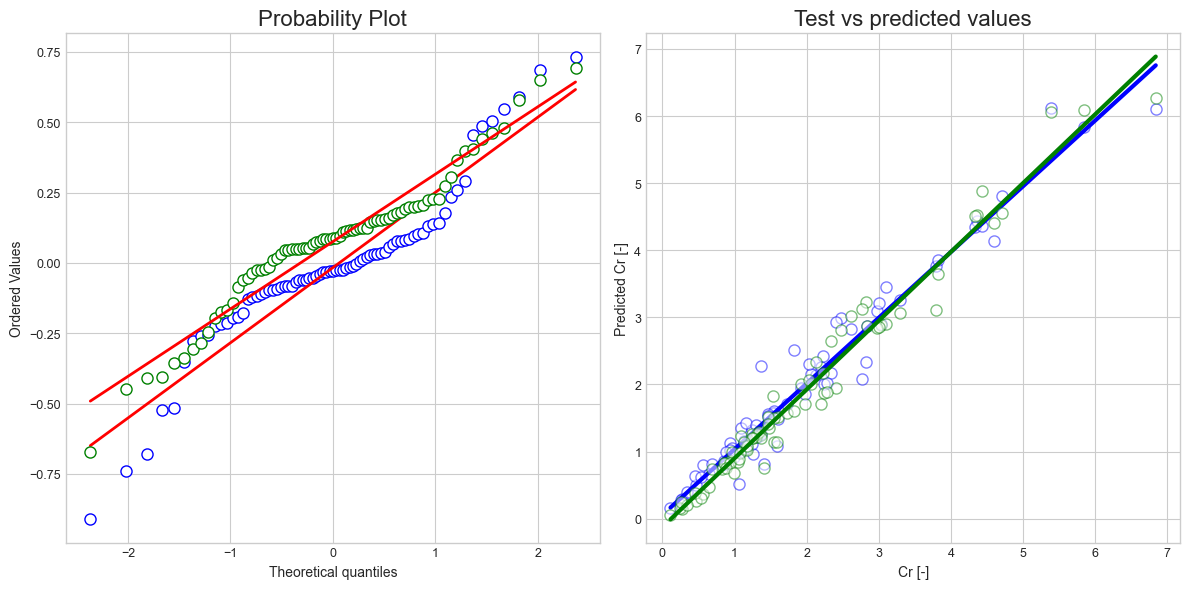

In [564]:
def  qq_plot(model, color):
    plt.rc('lines', markersize='8', markeredgecolor=color, markerfacecolor='white', markeredgewidth=1, linewidth=2)
    fig = stats.probplot(y_test-model, plot=ax0) 
    ax1.plot(y_test, model, 'o', alpha=0.5)
    sns.regplot(x=y_test, y=model, scatter=False, ax=ax1, color=color, ci=0)
    ax1.set_xlabel('Cr [-]')
    ax1.set_ylabel('Predicted Cr [-]')
    ax1.set_title('Test vs predicted values')
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
qq_plot(y_pred, 'blue')
qq_plot(y_pred_dnn, 'green')



## 7.3 Check for Multicollinearity

In [565]:
VIF = 1/(1-R2)
VIF


29.96271089850357

# 8 Eavaluation

In [589]:
#Input Data

#Lwl = df_test['LWL'].unique()[0]
#B = df_test['B'].unique()[0]
#Disp = df_test['VOLM'].unique()[0]
#Ta = df_test['TA'].unique()[0]
#Tf = df_test['TF'].unique()[0]
#LCB = df_test['LCB'].unique()[0]
#CP=df_test['CP'].unique()[0]
#k=df_test['k'].unique()[0]
#CM = df_test['CM'].unique()[0]
#V = df_test['V'].values
#Cr_real = df_test['Cr'].values
#Cr_real = [0.757,0.869,1.000,1.145,1.338,1.547,1.922,2.856,4.508,6.389]

Lwl = 66.18
B= 15
Disp = 3661
Ta = 5.4
Tf = 5.4
LCB = 28.548
CP = 0.7519
k = 0.32
CM = 0.959
V = np.arange(8,15,1)
Cr_real = [0.694, 0.808, 1.068, 1.549, 1.771, 2.264, 2.831]



In [590]:
WSA = c0[0]*np.log(c0[2]+Disp)+c0[1]
WSA

1424.6304385910917

In [591]:
X.columns

Index(['k', 'CB', 'LCB', 'CM', 'CP', 'BT', 'Fr', 'Trim'], dtype='object')

In [592]:
k

0.32

In [593]:
trim = (Ta-Tf)+3
T = (Ta+Tf)/2
Cb = Disp/(Lwl*B*T)


In [594]:
Cr_ML = []
Cr_DNN = []
FR = []
for i in V:
    Fr = i*0.51444/(Lwl*9.81)**0.5
    FrCr = c2[0]*np.exp(c2[1]+c2[2]*Fr)+c2[3]
   
    inp = np.array([k, Cb, LCB, CM, CP, B/T,Fr, trim])
    arr = np.zeros((2,len(inp)))
    arr[0] = inp
    arr[1] = inp
    Cr_ML.append(model.predict(inp.reshape(1,-1)))
    Cr_DNN.append(model_dnn.predict(arr))
    FR.append(Fr)

In [595]:
Cr_DNN = np.array(Cr_DNN)[:,0]

In [596]:
Cr = np.zeros((2,len(V)))
Cr[0] = Cr_ML
Cr[1] = Cr_DNN

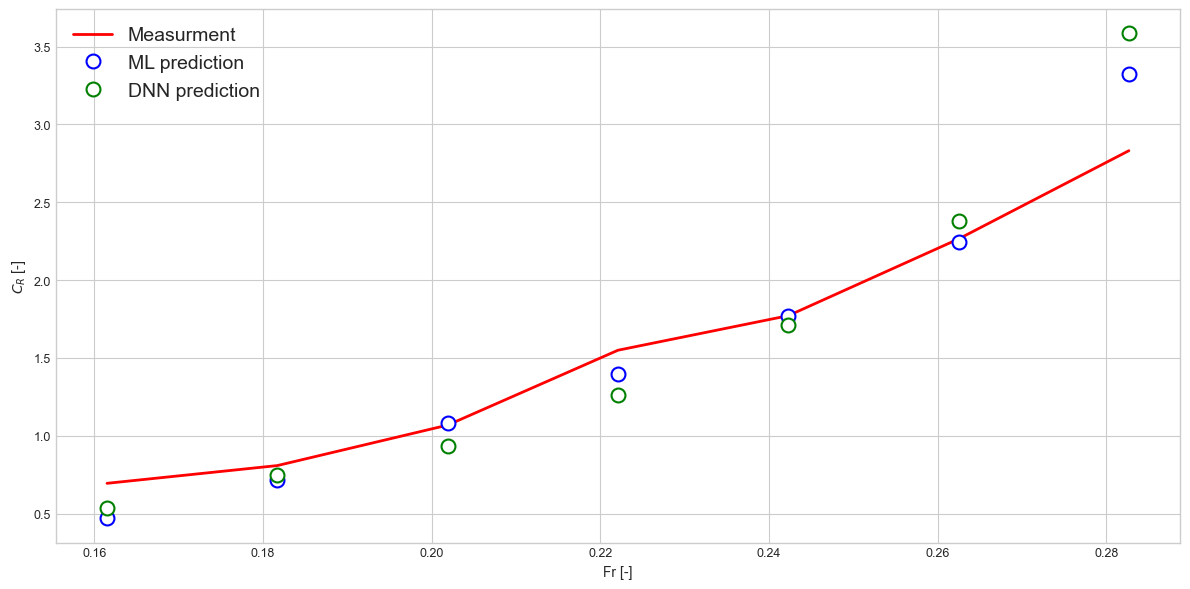

In [607]:
def plot_pred(Cr, color, lbl):
    plt.rc('lines', markersize='10', markeredgecolor=color, markerfacecolor='white', markeredgewidth=1.5, linewidth=2)

    ax.plot(FR, Cr, 'o', zorder=2, label=lbl)
    ax.set_xlabel('Fr [-]')
    ax.set_ylabel('$C_R$ [-]')
    plt.legend()

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(FR, Cr_real, c='red', label='Measurment')
plot_pred(Cr_ML, 'blue', 'ML prediction')
plot_pred(Cr_DNN, 'green', 'DNN prediction')

#ax.fill_between(FR, Cr[0]-confidence, Cr[0]+confidence, color='lightblue', alpha=.3)
#ax.fill_between(FR, Cr[1]-confidence, Cr[1]+confidence, color='lightgreen', alpha=.3)
#ax.set_ylim(0,8)

In [598]:
Cr_res  = pd.DataFrame()
Cr_res['Fr'] = ['%.3f' %x for x in FR]
Cr_res['CR_ML'] = ['%.3f' %x for x in Cr[0]]
Cr_res['CR_DNN'] = ['%.3f' %x for x in Cr[1]]
#Cr_res.to_csv('Cr_res.csv', sep=';'')
Cr_res.to_csv('Cr_res.csv', sep=';')

In [599]:
Cr_res

,Fr,CR_ML,CR_DNN
0,0.162,0.469,0.533
1,0.182,0.716,0.748
2,0.202,1.080,0.935
3,0.222,1.397,1.259
4,0.242,1.768,1.713
5,0.262,2.247,2.381
6,0.283,3.326,3.585


In [600]:
RTS_real = np.array([50.6, 65.1, 84.7, 113.0, 139.8, 179.2, 228.3])
#Cr_real = np.array(Cr_real)*10**-3

#CFM = np.array([3.736, 3.652,3.580,3.516,3.459,3.408,3.362,3.319,3.281,3.245])
CFS = np.array([1.843, 1.814, 1.789, 1.766, 1.746, 1.727, 1.710])
dCF = 0.739
CAA = 0.183
ro = 999
S = 1449
Sbk = 34

Vs = V*0.51444

In [601]:
CTS_ML = (CFS*(1+k) + dCF) + Cr_res['CR_ML'].to_numpy(dtype='float') + CAA
RTS_ML = 0.5*CTS_ML*ro*Vs**2*S*10**-6

In [602]:

CTS_DNN = (S+Sbk)/S*(CFS*(1+k) + dCF) + Cr_res['CR_DNN'].to_numpy(dtype='float') + CAA
RTS_DNN = 0.5*CTS_DNN*ro*Vs**2*S*10**-6

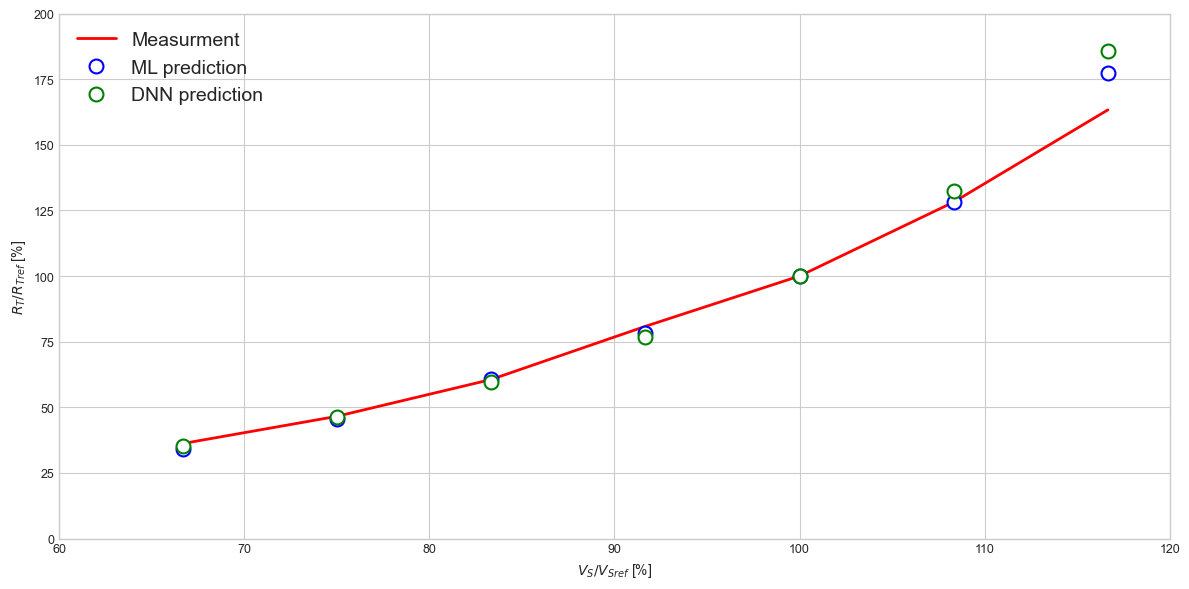

In [635]:
def plot_pred(Cr, color, lbl):
    plt.rc('lines', markersize='10', markeredgecolor=color, markerfacecolor='white', markeredgewidth=1.5, linewidth=2)

    ax.plot(V/V[4]*100, Cr, 'o', zorder=2, label=lbl)
    ax.set_xlabel('$V_{S}/V_{S ref}$ [%]')
    ax.set_ylabel('$R_{T}/R_{T ref}$ [%]')
    plt.legend()

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(V/V[4]*100, RTS_real/RTS_real[4]*100, c='red', label='Measurment')
plot_pred(RTS_ML/RTS_ML[4]*100, 'blue', 'ML prediction')
plot_pred(RTS_DNN/RTS_DNN[4]*100, 'green', 'DNN prediction')
ax.set_xlim(60,120)
ax.set_ylim(0,200)
plt.savefig('RT_pred_v2.png', dpi=300)